# **¿Qué haríamos sin ellos en el presente y futuro?**

*"Evolución de Infusiones y otros productos en el mercado interno argentino"*

# **Índice**

1. Datos Generales
2. Datasets
3. Definición de temática
4. Elección de Dataset para evaluación
5. Análisis Exploratorio de Datos (EDA)
6. Análisis de Series Temporales
7. Pronóstico de series temporales
8. Limpieza de dataset
9. Obtención de Insights
10. Entrenando un algoritmo de Machine Learning
11. La búsqueda de los parámetros óptimos para el modelo




# **1. Datos Generales**

Todo comenzó con una propiedad ganadera llamada Vuelta del Ombú, Departamento de Santo Tomé - Corrientes. La familia y sus descendientes desafiaron las tradiciones de la región y realizaron las primeras plantaciones de yerba mate. Posteriormente, se avanzó con la industrialización del producto elaborado con una marca que se posiciono en un mercado muy competitivo y de un producto de consumo primario. Desde principio de Siglo XX hasta la actualidad, la familia amplia el negocio a otros productos como el té, derivados de la yerba mate, ganadería, forestaciones (plantación de eucaliptus y pino) y otros rubros. Ya en el siglo XXI la empresa realiza convenios con varias empresas internacionales para comenzar a ser distribuidora nacional de sus productos, con lo cual además de productos nacionales de primera necesidad comienza la comercialización de otros productos. Actualmente, su cuarta generación se distingue por la elaboración integral de yerba mate y té de calidad internacional, apoyando a su comunidad y cuidando el entorno natural en que se desarrolla, apostando al crecimiento de la economía regional.


***a- ¿Qué es la Yerba Mate?***
La yerba mate, yerba de los jesuitas o yerba del Paraguay (en guaraní: ka'a), es una especie arbórea neotropical originaria de América del Sur presente en la región de Argentina, Paraguay y Brasil, así como también en las sierras boscosas de Uruguay en donde crece en estado silvestre. De las hojas y ramas, secas y molidas se prepara el mate, una infusión originaria de su zona de crecimiento natural y común en la gastronomía de Paraguay, el Sur de Brasil, Argentina, sur y, Uruguay y ciertas regiones del sur de Chile.
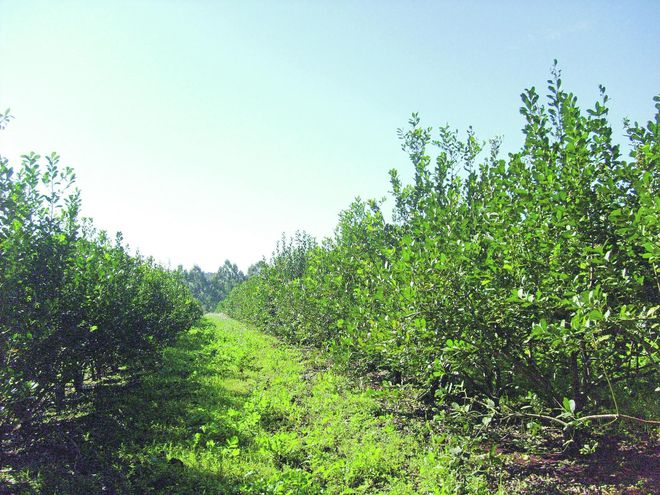



***b- ¿Qué es el té?***
El té es la infusión de las hojas y brotes de la planta del té (Camellia sinensis). La popularidad de esta bebida es solamente sobrepasada por el agua. Su sabor es fresco, ligeramente amargo y astringente; este gusto es agradable para mucha gente. El té proviene principalmente de China continental, India, Sri Lanka, Taiwán, Japón, Nepal, Australia, Argentina y Kenia. La planta de té se adapta mejor en climas tropicales y subtropicales, además necesita de lluvia aproximadamente 1250 mm por año. Las hojas del arbusto Camellia sinensis, si no son secadas apenas se recolectan, comienzan a oxidarse. Para prevenir este proceso de oxidación, se calientan con el objetivo de quitarles la humedad.

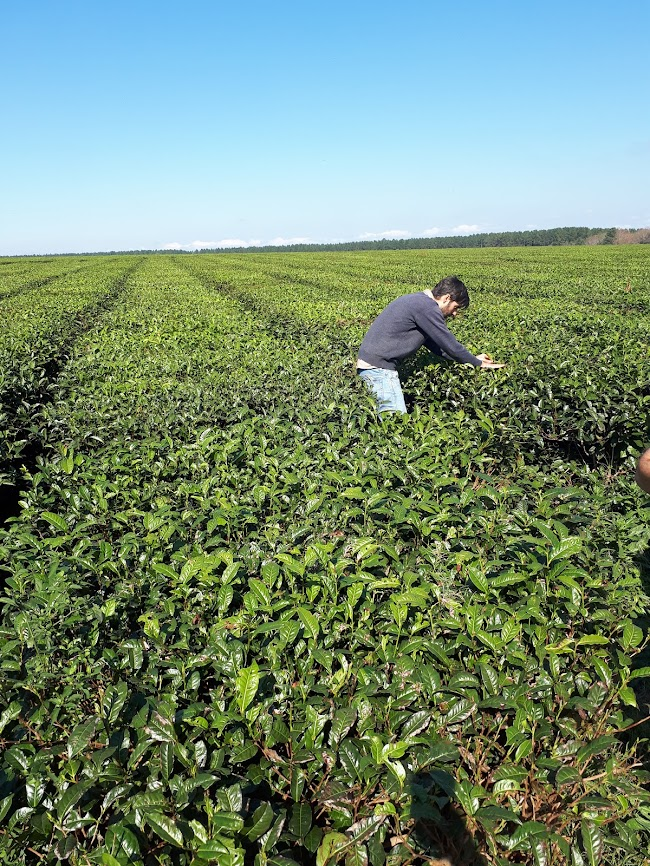


***c- Productos distribuidos***
La empresa negocia con marcas internacionales 3 tipos de productos, aquellos que son complementarios para sus productos principales (galletas, etc), productos que son de primera necesidad (arroz, pastas,etc) y productos para temporadas festivas.



# **2. Datasets**

Los datasets originales se encuentran en formato Excel, con datos agrupados de manera cerrada en Línea de Producto y Canal de Distribución, ambos con nombre genéricos, sin marcas y nombres de clientes, es importante destacar que la información también se encuentra a valores diarios desde enero de 2017 hasta el 19 de noviembre de 2022 (la misma base se irá actualizando a medida que avance el proyecto).



# **3. Definición de temática**

El dataset tiene la información de los niveles de facturación y costos tanto en pesos como en kilos, por línea de productos y los canales de distribución por los cuales llega al mercado.

A partir de esta información se puede comenzar a determinar la relación de facturación, rendimientos, costos, dado que estas variables poseen las mismas medidas.



# ***3.1-Hipótesis***

La empresa posee rendimientos por la comercialización 4 tipos de productos. 

La empresa buscará maximizar el nivel de facturación y rendimiento.


# ***3.2- Objetivos Principales***

A- Predecir que facturación en pesos.
B- Predecir que los tipos de rendimientos en pesos.


# ***3.3- Objetivos Secundarios***

1- Determinar relación entre facturación y costos, 
2- Determinar relación entre facturación y kilos, 
3- Determinar los costos por línea y cadena de distribución, 
4- Calcular rentabilidad,
5- Determinar períodos de mayor facturación.


# ***3.4- Usuarios finales:***

El alcance del presente es solamente en el ámbito del directorio y gerencias de la empresa, poniendo al alcance de la mano una herramienta diseñada especificamente para la toma futura de decisiones.


# ***3.5- Línea futura***

Este informe se puede ampliar con nuevos criterios de medida, se debe actualizar con nuevos datos, abrir por producto o canal de distribución y ampliar el espectro hacia otros rubros económicos desarrollados por la empresa para así tener un panorama más amplio de la actividad desarrollada.



# **4. Elección de Dataset para evaluación**

Como bien se detallo en los puntos anteriores, el dataset cuenta con datos relevantes como ingreso/costo por producto y cadena de distribución, por lo que se puede determinar la rentabilidad por cadena de distribución o por producto, conocer los kilos reales de productos comercializados. Este dataset contiene datos desde 2017 a noviembre 2022 (última información disponible).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import matplotlib.pylab as pltlab
%matplotlib inline
import datetime



plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('fast')
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5

 
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')



In [ ]:
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV

from math import sqrt


In [ ]:
# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import time
import itertools
import warnings
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import math


warnings.filterwarnings("ignore")

In [ ]:
productos_por_CanalDistrib= '/content/3.Base Prod por canal de distrib - Silvana Tomsig - Sebastián de León.csv'
df_ProdporCanal = pd.read_csv(productos_por_CanalDistrib,index_col=0, encoding='latin-1', sep=";")

En esta primera instancia, se importan todas las librerías estadísticas, gráficas y númericas, que serán utilizadas en el proceso de creación del proyecto.

Posteriormente, se carga el archivo csv con la información  base para el desarrollo de los análisis.

# **4.1. Facturación y kilos comercializados**

En este punto se mostrará la relación existente entre la facturación en pesos y en kilos, cuales han sido sus comportamientos a lo largo del período analizado (*ene-2017 a nov-2022*).

Cabe destacar que el dataset es una serie de tiempo, que se encuentra agrupado por línea (producto), canal de distribución, fecha y las variables que se tendrán en cuenta son: Facturación, Costo, Precio, Rendimiento y Kilos.  


# **a- Facturación**

En este primer análisis se evalua el total facturado en pesos por año, lo que se busca lograr con este análisis es  determinar la pendiente de la función asociada, la cuál es:

`Fact Total = precio x cantidad`

partiendo del supuesto que ambas son positivas cómo lo marca la teoría económica.

In [ ]:
df_FactyCosto =pd.read_csv(productos_por_CanalDistrib,encoding='latin-1',sep=";")
df_FactyCosto.head()

,Linea,Línea Unificada,Canal de distribución,Anio,Mes,Fecha,Fac Impo Bruto,Costo Total Com,Fac Kilos,Comercial Kilos,Rendimiento,Precio
0,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,1/1/2017,112715,0,660,0,112715,171
1,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,2/1/2017,418049,20107,9990,20050,397942,42
2,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,3/1/2017,741792,19313,18275,-7540,722479,41
3,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,4/1/2017,1647618,-456,39380,-685,1648074,42
4,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,5/1/2017,2437267,96214,59140,-2125,2341053,41


En este primer código, se genera un dataframe con la información.

In [ ]:
df_FactyCosto.index = df_FactyCosto['Anio']
df_FactyCosto = df_FactyCosto.drop('Anio', axis= 'columns')
df_FactyCosto

,Linea,Línea Unificada,Canal de distribución,Mes,Fecha,Fac Impo Bruto,Costo Total Com,Fac Kilos,Comercial Kilos,Rendimiento,Precio
Anio,,,,,,,,,,,
2017,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,Enero,1/1/2017,112715,0,660,0,112715,171
2017,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,Enero,2/1/2017,418049,20107,9990,20050,397942,42
2017,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,Enero,3/1/2017,741792,19313,18275,-7540,722479,41
2017,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,Enero,4/1/2017,1647618,-456,39380,-685,1648074,42
2017,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,Enero,5/1/2017,2437267,96214,59140,-2125,2341053,41
...,...,...,...,...,...,...,...,...,...,...,...
2022,ARROZ,Arroz,Distribuidores,Noviembre,18/11/2022,319489,0,1975,0,319489,162
2022,ARROZ,Arroz,Supermercados,Noviembre,18/11/2022,6320,0,40,0,6320,158
2022,ARROZ,Arroz,Grandes Mayoristas,Noviembre,18/11/2022,2105910,-1172,13500,-1020,2107082,156


En esta segunda etapa se realiza el orden de columnas, solicitando al dataframe que la primer columna sea la de año.

In [ ]:
df_FactyCostosAcum= df_FactyCosto.groupby(df_FactyCosto.index).sum()

df_FactyCostosAcum

,Fac Impo Bruto,Costo Total Com,Fac Kilos,Comercial Kilos,Rendimiento,Precio
Anio,,,,,,
2017,2689876184,1304658568,49921844,48484090,1385217616,467325
2018,3516697123,1894106520,47058141,46078964,1622590603,618331
2019,6428335305,2984817491,48595728,47356037,3443517814,747805
2020,9630303565,5459507599,46740370,45945724,4170795966,908960
2021,15861199544,9045146453,50118103,50267733,6816053091,1049620
2022,24736851897,12309034331,51982109,48116749,12427817566,5127085


Este código se le pide que agrupe o sume por año las variables que encuentre en el dataframe.

In [ ]:
df_Fact= df_FactyCostosAcum['Fac Impo Bruto']
df_Fact

Anio
2017     2689876184
2018     3516697123
2019     6428335305
2020     9630303565
2021    15861199544
2022    24736851897
Name: Fac Impo Bruto, dtype: int64

Este código se le solicita que genere un sub dataframe con la Facturación por año.

In [ ]:
x = df_Fact.index
y = df_Fact
y

Anio
2017     2689876184
2018     3516697123
2019     6428335305
2020     9630303565
2021    15861199544
2022    24736851897
Name: Fac Impo Bruto, dtype: int64

Se definen las variables para los ejes dimensionales.

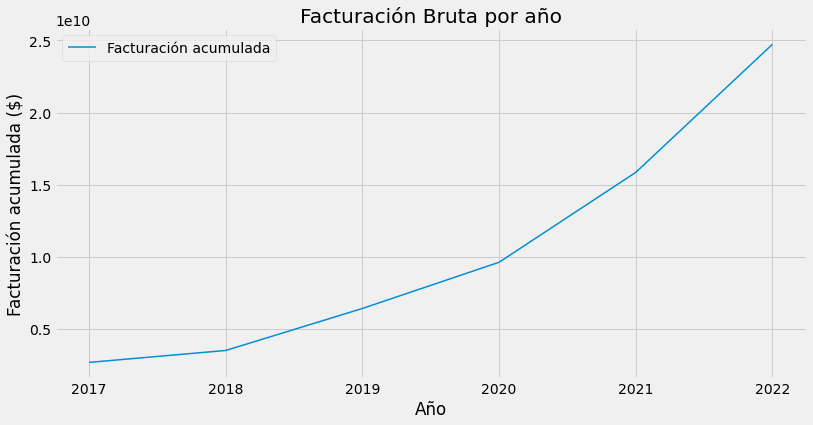

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(x, y, label='Facturación acumulada')
ax.set_xlabel('Año')                  
ax.set_ylabel('Facturación acumulada ($)')
ax.set_title('Facturación Bruta por año')
ax.legend()

***Conclusión a:***

En este primer gráfico se busca evaluar la evolución de la facturación en el tiempo, lo que evidencia visualmente es que el nivel de facturación en pesos ha mantenido una correlación positiva en el tiempo.

Es decir que ambas variables de la función de ingresos tienen relación positiva.

***b- Facturación en kilos***

En este segundo análisis, se busca conocer la evolución de la cantidad de kilos facturados por año.

En el apartado a) se pudo concluir que hay correlación positiva, ahora nos queda saber si los kilos facturados son los que contribuyen a esa correlación.

In [ ]:
df_KilosFacturados = df_FactyCosto[['Mes','Fac Kilos']]

data = df_FactyCostosAcum['Fac Kilos']

En el punto a- se generó un dataframe universal para luego dar pie a obtener sub datas que nos permitan comparar las variables desde distintas ópticas. 

A este código se le solicita que genere un sub dataframe con los Kilos Facturados.

In [ ]:
x= data.index
y =data
y

Anio
2017    49921844
2018    47058141
2019    48595728
2020    46740370
2021    50118103
2022    51982109
Name: Fac Kilos, dtype: int64

Se definen las variables para los ejes dimensionales.

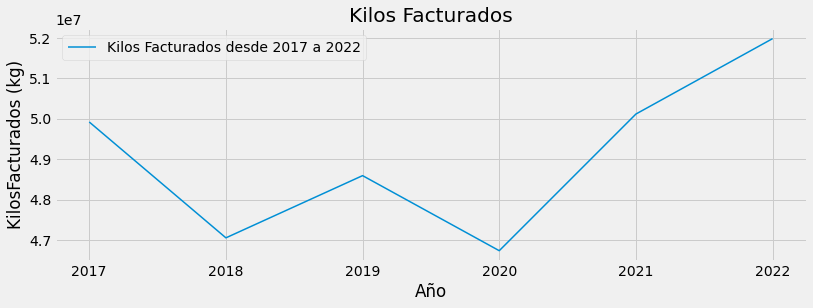

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x, y, label='Kilos Facturados desde 2017 a 2022')
ax.set_xlabel('Año')                  
ax.set_ylabel('KilosFacturados (kg)')
ax.set_title('Kilos Facturados')
ax.legend() 

***Conclusión b:***

En este gráfico se puede destacar que la evolución de los kilos facturados ha tenido un fuerte descenso en los años de referencia.

De acuerdo a la conclusión del primer punto, la correlación positiva es mayor vía precios, con lo cual ese incremento es de suponer mayor que el descenso de la cantidad facturada, para así lograr los ingresos positivos.

***c- Facturación en pesos versus kilos***

A partir de los dos análisis anteriores, surge la incognita de que tipo de relación existe entre el nivel de facturación en pesos y en kilos.

Text(0.5, 1.0, 'Relación entre Kilos facturados y Montos facturados')

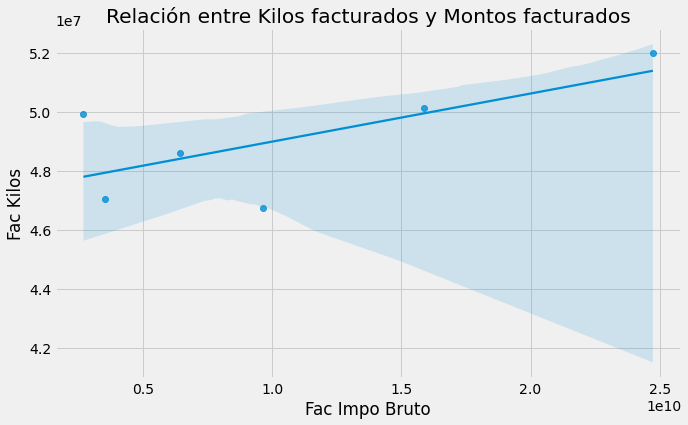

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(data=df_FactyCostosAcum, x='Fac Impo Bruto', y='Fac Kilos')
plt.title("Relación entre Kilos facturados y Montos facturados")

***Conclusión c:***


En el punto a se evidenció que la facturación en pesos como función de ingresos su pendiente es positiva, posteriormente se visualizó que los kilos facturados presentaron caíddas y recuperaicones con el paso de los años.

Al comparar ambas variables se puede interpretar que su correlación es positiva, por lo que se puede deducir que existe la variable que crece con el transcurso del tiempo.

***d- Kilos comercializados versus facturados***

Una vez analizada la relación entre las cantidades comercializadas en kilos y en pesos, nos resta verificar si las cantidades comercializadas y facturadas coinciden o tienen alguna diferencia.

Text(0.5, 1.0, 'Relación entre Kilos facturados y Kilos Comerciales')

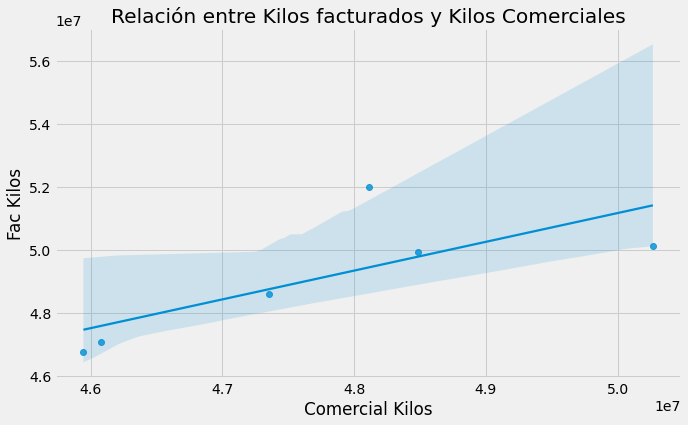

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(data=df_FactyCostosAcum, x='Comercial Kilos', y='Fac Kilos')
plt.title("Relación entre Kilos facturados y Kilos Comerciales")

***Conclusión d:***

Para este caso las variables de estudio muestran una relación directamente proporcional.

Visualmente se registra que entre ambas variables existe una diferencia, que puede deberse a diferentes razones (por ejemplo: merma o pérdidas). Será de estudio para futuro si las cantidades informadas por mermas o pérdidas son iguales a la diferencia existente este estas dos variables.

# **4.2. Facturación y Costos**


Para continuar con el análisis, se comprobará la relación que poseen las variables en pesos Facturación (Ingresos) vs los Costos Totales de Ventas.

En la teoría económica, el costo esta relacionado o es formador del precio de venta, por lo cual existe una directa relación entre ambas variables.

Text(0.5, 1.0, 'Relación entre Facturación y Costos de Ventas')

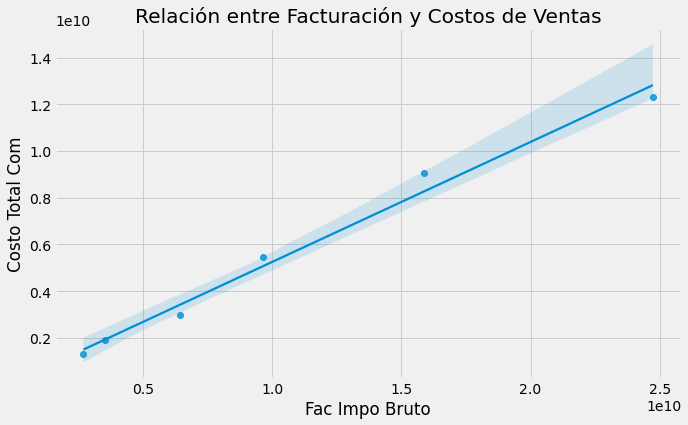

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(data=df_FactyCostosAcum, x='Fac Impo Bruto', y='Costo Total Com')
plt.title("Relación entre Facturación y Costos de Ventas")

***Conclusión:***

Al observar esta relación se evidencia cómo bien menciona la teoría, que ambas variables poseen una relación directamente proporcional, al aumentar una variable automáticamente la otra aumenta.

# **4.3- Canal de distribución**

Desglosando las variables, se puede evaluar la facturación y los costos tanto en pesos como en kilos por cada canal utilizado para la distribución de los distintos productos.

***a- Facturación por Canal***

Para comenzar este análisis se comenzará evaluando los canales de distribución por el nivel facturado para cada uno.

In [ ]:
df_CostoporCanal =pd.read_csv(productos_por_CanalDistrib,encoding='latin-1',sep=";")
df_CostoporCanal.head()

,Linea,Línea Unificada,Canal de distribución,Anio,Mes,Fecha,Fac Impo Bruto,Costo Total Com,Fac Kilos,Comercial Kilos,Rendimiento,Precio
0,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,1/1/2017,112715,0,660,0,112715,171
1,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,2/1/2017,418049,20107,9990,20050,397942,42
2,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,3/1/2017,741792,19313,18275,-7540,722479,41
3,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,4/1/2017,1647618,-456,39380,-685,1648074,42
4,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,5/1/2017,2437267,96214,59140,-2125,2341053,41


En este caso, se solicita que genere un dataframe con la información que brinda el dataset.

In [ ]:
df_CostoporCanalAcum = df_CostoporCanal.groupby(['Canal de distribución']).sum()
df_CostoporCanalAcum

,Anio,Fac Impo Bruto,Costo Total Com,Fac Kilos,Comercial Kilos,Rendimiento,Precio
Canal de distribución,,,,,,,
Cadenas de Supermercados,19418053,22305785351,12377584665,106238072,104602035,9928200686,2030999
Distribuidores,14936392,13736752310,7235867431,62491210,62146155,6500884879,1956654
Grandes Mayoristas,14998389,21149729283,10422296722,95531749,89865955,10727432561,2100692
Mayoristas,12594615,1712372153,904512272,9138692,9009936,807859881,1151644
Supermercados,17474432,3958624521,2057009872,21016572,20625216,1901614649,1679137


Este código se le pide que agrupe o sume por canal de distribución las variables que encuentre en el dataframe.

In [ ]:
df_CanalDistrib= df_CostoporCanalAcum['Fac Impo Bruto'] 
df_CanalDistrib = df_CanalDistrib.sort_values(ascending=False) 
df_CanalDistrib

Canal de distribución
Cadenas de Supermercados    22305785351
Grandes Mayoristas          21149729283
Distribuidores              13736752310
Supermercados                3958624521
Mayoristas                   1712372153
Name: Fac Impo Bruto, dtype: int64

Con este código solicitamos que nos muestre solamente la Facturación en pesos por Canal en forma ascendente.

In [ ]:
x= df_CanalDistrib.index 
y =df_CanalDistrib
y 

Canal de distribución
Cadenas de Supermercados    22305785351
Grandes Mayoristas          21149729283
Distribuidores              13736752310
Supermercados                3958624521
Mayoristas                   1712372153
Name: Fac Impo Bruto, dtype: int64

Se definen las variables para los ejes dimensionales.

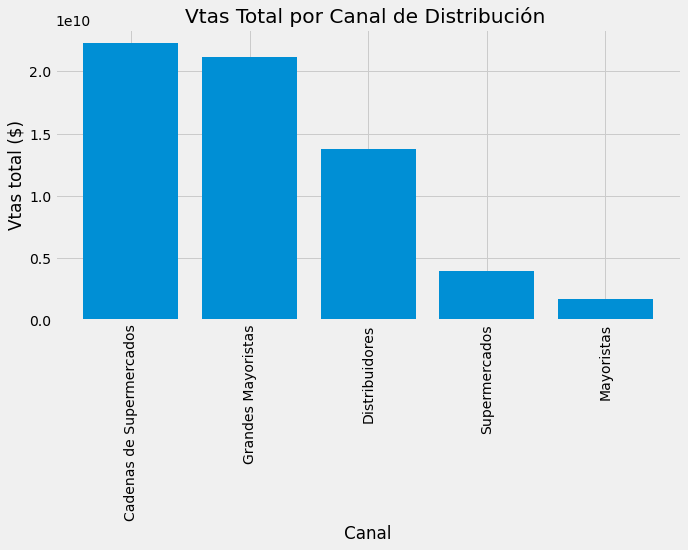

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x,y)
ax.set_title('Vtas Total por Canal de Distribución ')
ax.set_ylabel('Vtas total ($)')
ax.set_xlabel('Canal')
plt.xticks(rotation=90)
plt.show()

***Conclusión a:***

Graficamente se puede observar por tendencia que tanto las Cadenas de Supermercados y los Grandes Mayoristas son los que representan los mayores distribuidores de los productos.

***b- Costos de Ventas por Canal de distribución***

Para continuar el desglose de las variables, se continua con los costos evaluados por canal.

In [ ]:
df_CanalDistrib= df_CostoporCanalAcum['Costo Total Com'] 
df_CanalDistrib = df_CanalDistrib.sort_values(ascending=False) 
df_CanalDistrib

Canal de distribución
Cadenas de Supermercados    12377584665
Grandes Mayoristas          10422296722
Distribuidores               7235867431
Supermercados                2057009872
Mayoristas                    904512272
Name: Costo Total Com, dtype: int64

Con este código solicitamos que nos muestre solamente la Costos por venta por Canal en forma ascendente.

In [ ]:
x= df_CanalDistrib.index 
y =df_CanalDistrib
y 

Canal de distribución
Cadenas de Supermercados    12377584665
Grandes Mayoristas          10422296722
Distribuidores               7235867431
Supermercados                2057009872
Mayoristas                    904512272
Name: Costo Total Com, dtype: int64

Se definen las variables para los ejes dimensionales.

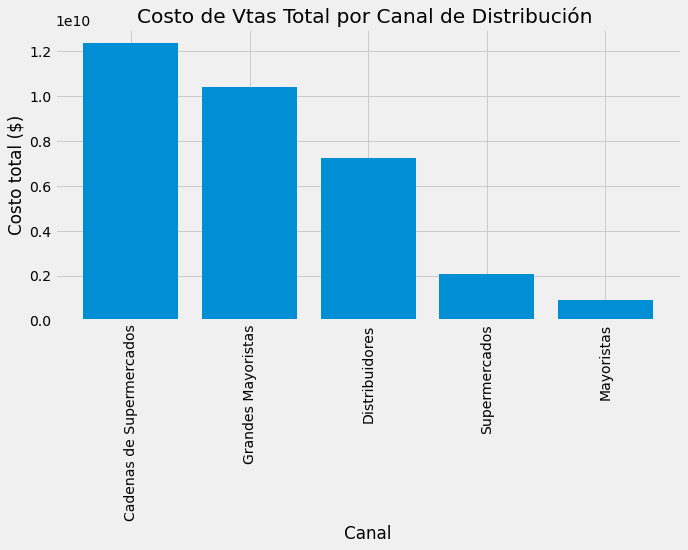

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x,y)
ax.set_title('Costo de Vtas Total por Canal de Distribución ')
ax.set_ylabel('Costo total ($)')
ax.set_xlabel('Canal')
plt.xticks(rotation=90)
plt.show()

***Conclusión b:***

Los costos acompañan la tendencia que mostró el punto anterior en que tanto Cadenas de Supermercados y Grandes Mayoristas son los canales que concentran la mayor cantidad de productos distribuidos.

***c- Facturación y Costos***

En este punto se mostrará la relación existente entre estas variables y cuales han sido sus comportamientos.

Text(0.5, 1.0, 'Relación entre Facturación y Costos por Canal de Distribución')

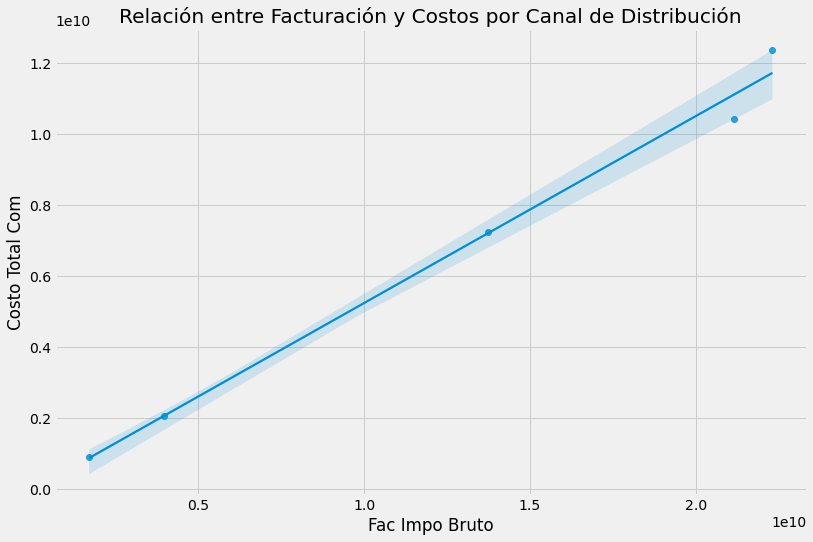

In [ ]:
plt.figure(figsize=(12,8))
sns.regplot(data=df_CostoporCanalAcum, x='Fac Impo Bruto', y='Costo Total Com')
plt.title("Relación entre Facturación y Costos por Canal de Distribución")

***Conclusión c:***

A partir de la agrupación de las variables por cadena de distribución, se evalua la relación que poseen las variables que nos brindrán información sobre rentabilidad. Las variables de facturación y de costos poseen una relación directamente proporcional.

# **5. Análisis Exploratorio de Datos (EDA)**

*“Es preferible una respuesta aproximada a la pregunta correcta, que frecuentemente es formulada de manera imprecisa, que una respuesta exacta a la pregunta incorrecta, que siempre puede ser formulada de manera precisa.” — John Tukey*


***a- Columnas, nulos y tipo de datos***

Veamos que contiene el dataset y su estructura

In [ ]:
df_FactyCosto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39334 entries, 2017 to 2022
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Linea                  39334 non-null  object
 1   Línea Unificada        39334 non-null  object
 2   Canal de distribución  39334 non-null  object
 3   Mes                    39334 non-null  object
 4   Fecha                  39334 non-null  object
 5   Fac Impo Bruto         39334 non-null  int64 
 6   Costo Total Com        39334 non-null  int64 
 7   Fac Kilos              39334 non-null  int64 
 8   Comercial Kilos        39334 non-null  int64 
 9   Rendimiento            39334 non-null  int64 
 10  Precio                 39334 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 3.6+ MB


En esta salida vemos las columnas, el total de filas y la cantidad de filas sin nulos. También los tipos de datos.

El data cuenta con 11 columnas, 39334 filas no nulas y 5 datos del tipo categoricos y 6 números enteros.

***b- Descripción estadística de datos***

Busquemos los principales indices estadísticos de nuestras variables.

In [ ]:
df_FactyCosto.describe()

,Fac Impo Bruto,Costo Total Com,Fac Kilos,Comercial Kilos,Rendimiento,Precio
count,3.933400e+04,3.933400e+04,39334.000000,3.933400e+04,3.933400e+04,39334.000000
mean,1.598191e+06,8.388994e+05,7485.033177,7.277401e+03,7.592920e+05,226.753597
std,4.305349e+06,4.327912e+06,16991.310990,3.707081e+04,5.236676e+06,505.035699
min,0.000000e+00,-1.098530e+07,0.000000,-1.374750e+06,-1.675633e+08,0.000000
25%,2.852000e+03,0.000000e+00,25.000000,0.000000e+00,-2.080750e+03,51.000000
50%,6.018650e+04,8.017500e+03,505.000000,1.200000e+02,1.212100e+04,92.000000
75%,1.010698e+06,1.672308e+05,5834.500000,2.000000e+03,4.663802e+05,225.000000
max,8.165910e+07,1.859240e+08,211249.000000,1.374699e+06,8.134183e+07,8753.000000


1- Las variables de interés y para profundizar el estudio son Facturación y Costos.

2- La desviación estandar nos muestra que el Costo es un 0,000004 aproximado del nivel Facturado.

3- Es de interés conocer cuanto puede absorber la empresa del incremento de los costos y cuanto se trasldada a la formación del precio que afecta la facturación final.


***c- Correlación de variables***

Verifiquemos si hay correlación entre los datos

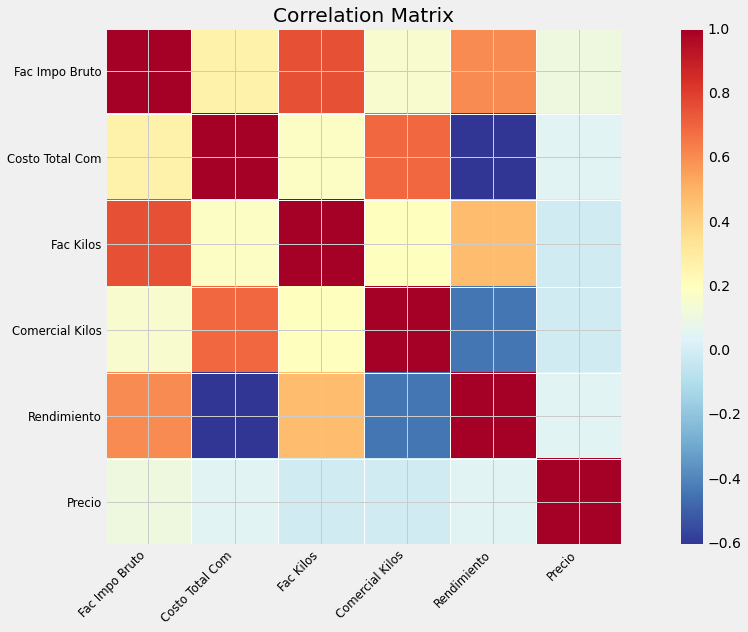

In [ ]:
corr= df_FactyCosto.corr()
sm.graphics.plot_corr(corr,xnames=(list(corr.columns)))
plt.show()

A partir de este tree map podemos concluir que las variables de interés y el resto no poseen correlación.

# **6. Análisis de Series Temporales**

Una serie temporal es cualquier conjunto de datos donde los valores se miden en diferentes puntos en el tiempo. Muchas series temporales son medidas uniformemente con una frecuencia específica, por ejemplo, las mediciones climáticas por hora, los recuentos diarios de visitas a sitios web o las ventas totales mensuales.

Para avanzar en nuestro estudio de caso, se aplicará "análisis de series de tiempo", dado que se cuenta con la información para evaluar por producto y cadena.

A este fin se amplio el dataset con las fecha de facturas, generando un dataset más amplio para esta etapa.

En este segmento nos enfocaremos principalmente en "data wrangling" y en los aspectos de visualización del análisis de las series temporales. Trabajando con una serie temporal de datos mencionada en el párrafo anterior, se observará la forma en que técnicas como la indexación basada en el tiempo, el remuestreo y las ventanas deslizantes pueden ser de gran ayuda en la exploración de variaciones en la demanda de productos y el suministro por cadena de distribución a lo largo del tiempo. Los siguientes temas serán cubiertos:

1- Conjunto de datos: Open Power Systems Data.
2- Estructuras de datos de series temporales.
3- Indexación basada en el tiempo.
4- Visualización de datos de series temporales.
5- Estacionalidad.
6- Frecuencias.
7- Remuestreo.
8- Ventanas deslizantes.
9- Tendencias.


## ***6.1 - Open Power Systems Data***

Se explorará cómo la facturación y costos de productos han variado a lo largo del tiempo, utilizando las herramientas de las series temporales de Pandas para responder las siguientes preguntas:

¿Cuándo es el producto posee ventas tipicamente más altas y más bajas?
¿Cómo varía el costo de los productos con las estaciones del año?
¿Cuáles son las tendencias a largo plazo en el consumo de los porductos sustitutos y complementarios?
¿Cómo se compara la facturación por producto con el costo, y cómo ha cambiado esta relación con el tiempo?



## ***6.2- Estructura de datos de series temporales***

Para trabajar con datos de series temporales, se utilizará un DatatimeIdex de fecha/hora como el índice para nuestro DataFrame. Veamos cómo hacer esto con nuestro conjunto de datos OPSD. Primero, usamos la función read_csv() para leer los datos en un DataFrame, y luego mostrar su forma.


In [ ]:
linea_de_Productos = '/content/3.Base Prod por canal de distrib - Silvana Tomsig - Sebastián de León.csv'
df_LineaProductos = pd.read_csv(linea_de_Productos,index_col=5, encoding='latin-1', sep=";")
df_LineaProductos.head()

,Linea,Línea Unificada,Canal de distribución,Anio,Mes,Fac Impo Bruto,Costo Total Com,Fac Kilos,Comercial Kilos,Rendimiento,Precio
Fecha,,,,,,,,,,,
1/1/2017,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,112715,0,660,0,112715,171
2/1/2017,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,418049,20107,9990,20050,397942,42
3/1/2017,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,741792,19313,18275,-7540,722479,41
4/1/2017,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,1647618,-456,39380,-685,1648074,42
5/1/2017,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,2437267,96214,59140,-2125,2341053,41


El DataFrame tiene 97335 filas, que abarcan desde el 1 de enero de 2017 hasta el 02 de agosto de 2022. Para ver el los datos, se utilizan los métodos head() y tail() que muestran las primeras y las últimas filas del documento

Cabe destacar  que se realizo un Data Wrailing del dataset del cual se depuro valores nulos, productos con ventas en pocas fechas y canales que no poseían gran movimientos.

In [ ]:
df_LineaProductos.head(10)

,Linea,Línea Unificada,Canal de distribución,Anio,Mes,Fac Impo Bruto,Costo Total Com,Fac Kilos,Comercial Kilos,Rendimiento,Precio
Fecha,,,,,,,,,,,
1/1/2017,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,112715,0,660,0,112715,171
2/1/2017,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,418049,20107,9990,20050,397942,42
3/1/2017,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,741792,19313,18275,-7540,722479,41
4/1/2017,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,1647618,-456,39380,-685,1648074,42
5/1/2017,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,2437267,96214,59140,-2125,2341053,41
6/1/2017,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,21909,18404,540,-1755,3505,41
9/1/2017,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,220693,25639,5080,10220,195054,43
10/1/2017,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,1270074,-9864,30975,-6460,1279938,41
11/1/2017,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,323032,11677,7815,-12335,311355,41


Para definir el índice que se desea, se utilizan los parámetros index_col y parse_dates de la función read_csv(). Esto suele ser un atajo útil.

In [ ]:
df_LineaProductos_fecha = pd.read_csv(linea_de_Productos,index_col=5, encoding='latin-1', sep=";",parse_dates=True)
df_LineaProductos_fecha.index

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01',
               ...
               '2022-11-17', '2022-11-17', '2022-11-17', '2022-11-17',
               '2022-11-18', '2022-11-18', '2022-11-18', '2022-11-18',
               '2022-11-18', '2022-11-19'],
              dtype='datetime64[ns]', name='Fecha', length=39334, freq=None)

El índice de el DataFrame es un índice de fecha y hora, se puede utilizar la indexación basada en el tiempo para organizar y analizar datos.

In [ ]:
df_LineaProductos_fecha['Año']= df_LineaProductos_fecha.index.year
df_LineaProductos_fecha['Mes']= df_LineaProductos_fecha.index.month
df_LineaProductos_fecha.sample(15, random_state=0) 

,Linea,Línea Unificada,Canal de distribución,Anio,Mes,Fac Impo Bruto,Costo Total Com,Fac Kilos,Comercial Kilos,Rendimiento,Precio,Año
Fecha,,,,,,,,,,,,
2018-08-21,YERBA MATE HIERBAS,Yerba Mate,Distribuidores,2018,8,25076,6007,280,125,19069,90,2018
2018-10-23,YERBA MATE TRADICIONAL,Yerba Mate,Cadenas de Supermercados,2018,10,346508,750438,3738,14233,-403930,93,2018
2020-02-29,YERBA MATE FUNCIONALES,Yerba Mate,Supermercados,2020,2,689,2200,9,63,-1511,77,2020
2018-04-30,YERBA MATE TRADICIONAL,Yerba Mate,Grandes Mayoristas,2018,4,244660,7676468,3862,258588,-7431808,63,2018
2020-09-06,YERBA MATE TRADICIONAL,Yerba Mate,Distribuidores,2020,9,1198568,320261,6668,2835,878307,180,2020
2020-07-07,YERBA MATE TRADICIONAL,Yerba Mate,Mayoristas,2020,7,406198,651347,1948,4272,-245149,209,2020
2018-06-11,YERBA MATE HIERBAS,Yerba Mate,Mayoristas,2018,6,6980,0,70,0,6980,100,2018
2017-08-22,YERBA MATE BCP,Yerba Mate,Mayoristas,2017,8,0,4973,0,200,-4973,0,2017
2017-02-28,YERBA MATE FUNCIONALES,Yerba Mate,Supermercados,2017,2,140,108,1,1,32,140,2017


Un aspecto útil del indexado de fecha es que los componentes de fecha individualmente están disponibles como atributos, como año (year), mes (month), día (day), entre otros. Se agregarán algunas columnas mas al dataframe, que contienen el año y mes

## ***6.3-Indexación basada en el Tiempo***

Una de las características más poderosas y convenientes de las series temporales es la indexación basada en el tiempo: el uso de fechas y horas para organizar y acceder de forma intuitiva a los datos. Con la indexación basada en el tiempo, se pueden utilizar cadenas de caracteres con formato de fecha/hora para seleccionar datos en el DataFrame con la función loc. Esto funciona de manera similar a la indexación basada en etiquetas estándar, pero con algunas características adicionales.

Para nuesto Dataframe no será útil el uso de hora, lo que si nos permitirá evaluar de manera puntial con fechas las líneas de productos.

***a- Intervalo cerrado***

Vamos a seleccionar un intervalo cerrado de un año

In [ ]:
df_LineaProductos_fecha.loc['2019-01-01':'2019-12-31']

,Linea,Línea Unificada,Canal de distribución,Anio,Mes,Fac Impo Bruto,Costo Total Com,Fac Kilos,Comercial Kilos,Rendimiento,Precio,Año
Fecha,,,,,,,,,,,,
2019-01-01,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2019,1,792419,0,4640,0,792419,171,2019
2019-02-01,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2019,2,2392274,53182,27225,1275,2339092,88,2019
2019-03-01,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2019,3,8166585,299067,92345,7310,7867518,88,2019
2019-04-01,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2019,4,4638021,18625,52300,450,4619396,89,2019
2019-05-01,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2019,5,3140438,0,36460,0,3140438,86,2019
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-05-23,YERBA MATE FUNCIONALES,Yerba Mate,Supermercados,2019,5,8821,7606,37,32,1215,238,2019
2019-06-23,YERBA MATE FUNCIONALES,Yerba Mate,Distribuidores,2019,6,19550,16787,70,70,2763,279,2019
2019-03-31,YERBA MATE FUNCIONALES,Yerba Mate,Supermercados,2019,3,11652,15893,46,60,-4241,253,2019


En la evolución gráfica de kilos comerciales del punto 4.1.b se muestra que ese año es el año que más kilos se venden, en cambio en Facturación tal cual lo muestra el punto 4.1.a el año con mejores ventas es 2021. 

Con est herramienta de series analizaremos estos puntos.

# ***6.4-Visualización de Datos de Series Temporales***

Con pandas y matplotlib, se pueden visualizar fácilmente nuestros datos de las series temporales. En esta sección, se cubrirán algunos ejemplos y algunas personalizaciones. 

a- Facturación en kilos

Se creará un gráfico de líneas de la series temporales completas de la facturación diaria de todos los productos comercializados, utilizando el método plot().

In [ ]:
df_Kilos_2019= df_LineaProductos_fecha.loc['2019-07','Fac Kilos'].sort_index()
df_Kilos_2019 = df_Kilos_2019.groupby(df_Kilos_2019.index).sum()
df_Kilos_2019

Fecha
2019-07-01    173595
2019-07-02    209164
2019-07-03    287071
2019-07-04      1200
2019-07-05    218983
2019-07-06    250131
2019-07-07      1612
2019-07-08    219639
2019-07-09     42399
2019-07-10    208493
2019-07-11    249646
2019-07-12     79127
2019-07-13     32935
2019-07-14       204
2019-07-15    251800
2019-07-16    176543
2019-07-17    182695
2019-07-18    178084
2019-07-19    136523
2019-07-20     67743
2019-07-21       143
2019-07-22    140902
2019-07-23    113076
2019-07-24    191744
2019-07-25    128408
2019-07-26    160884
2019-07-27      1079
2019-07-28        40
2019-07-29    109254
2019-07-30    157159
2019-07-31    205574
Name: Fac Kilos, dtype: int64

In [ ]:
x= df_Kilos_2019.index
y =df_Kilos_2019
y


Fecha
2019-07-01    173595
2019-07-02    209164
2019-07-03    287071
2019-07-04      1200
2019-07-05    218983
2019-07-06    250131
2019-07-07      1612
2019-07-08    219639
2019-07-09     42399
2019-07-10    208493
2019-07-11    249646
2019-07-12     79127
2019-07-13     32935
2019-07-14       204
2019-07-15    251800
2019-07-16    176543
2019-07-17    182695
2019-07-18    178084
2019-07-19    136523
2019-07-20     67743
2019-07-21       143
2019-07-22    140902
2019-07-23    113076
2019-07-24    191744
2019-07-25    128408
2019-07-26    160884
2019-07-27      1079
2019-07-28        40
2019-07-29    109254
2019-07-30    157159
2019-07-31    205574
Name: Fac Kilos, dtype: int64

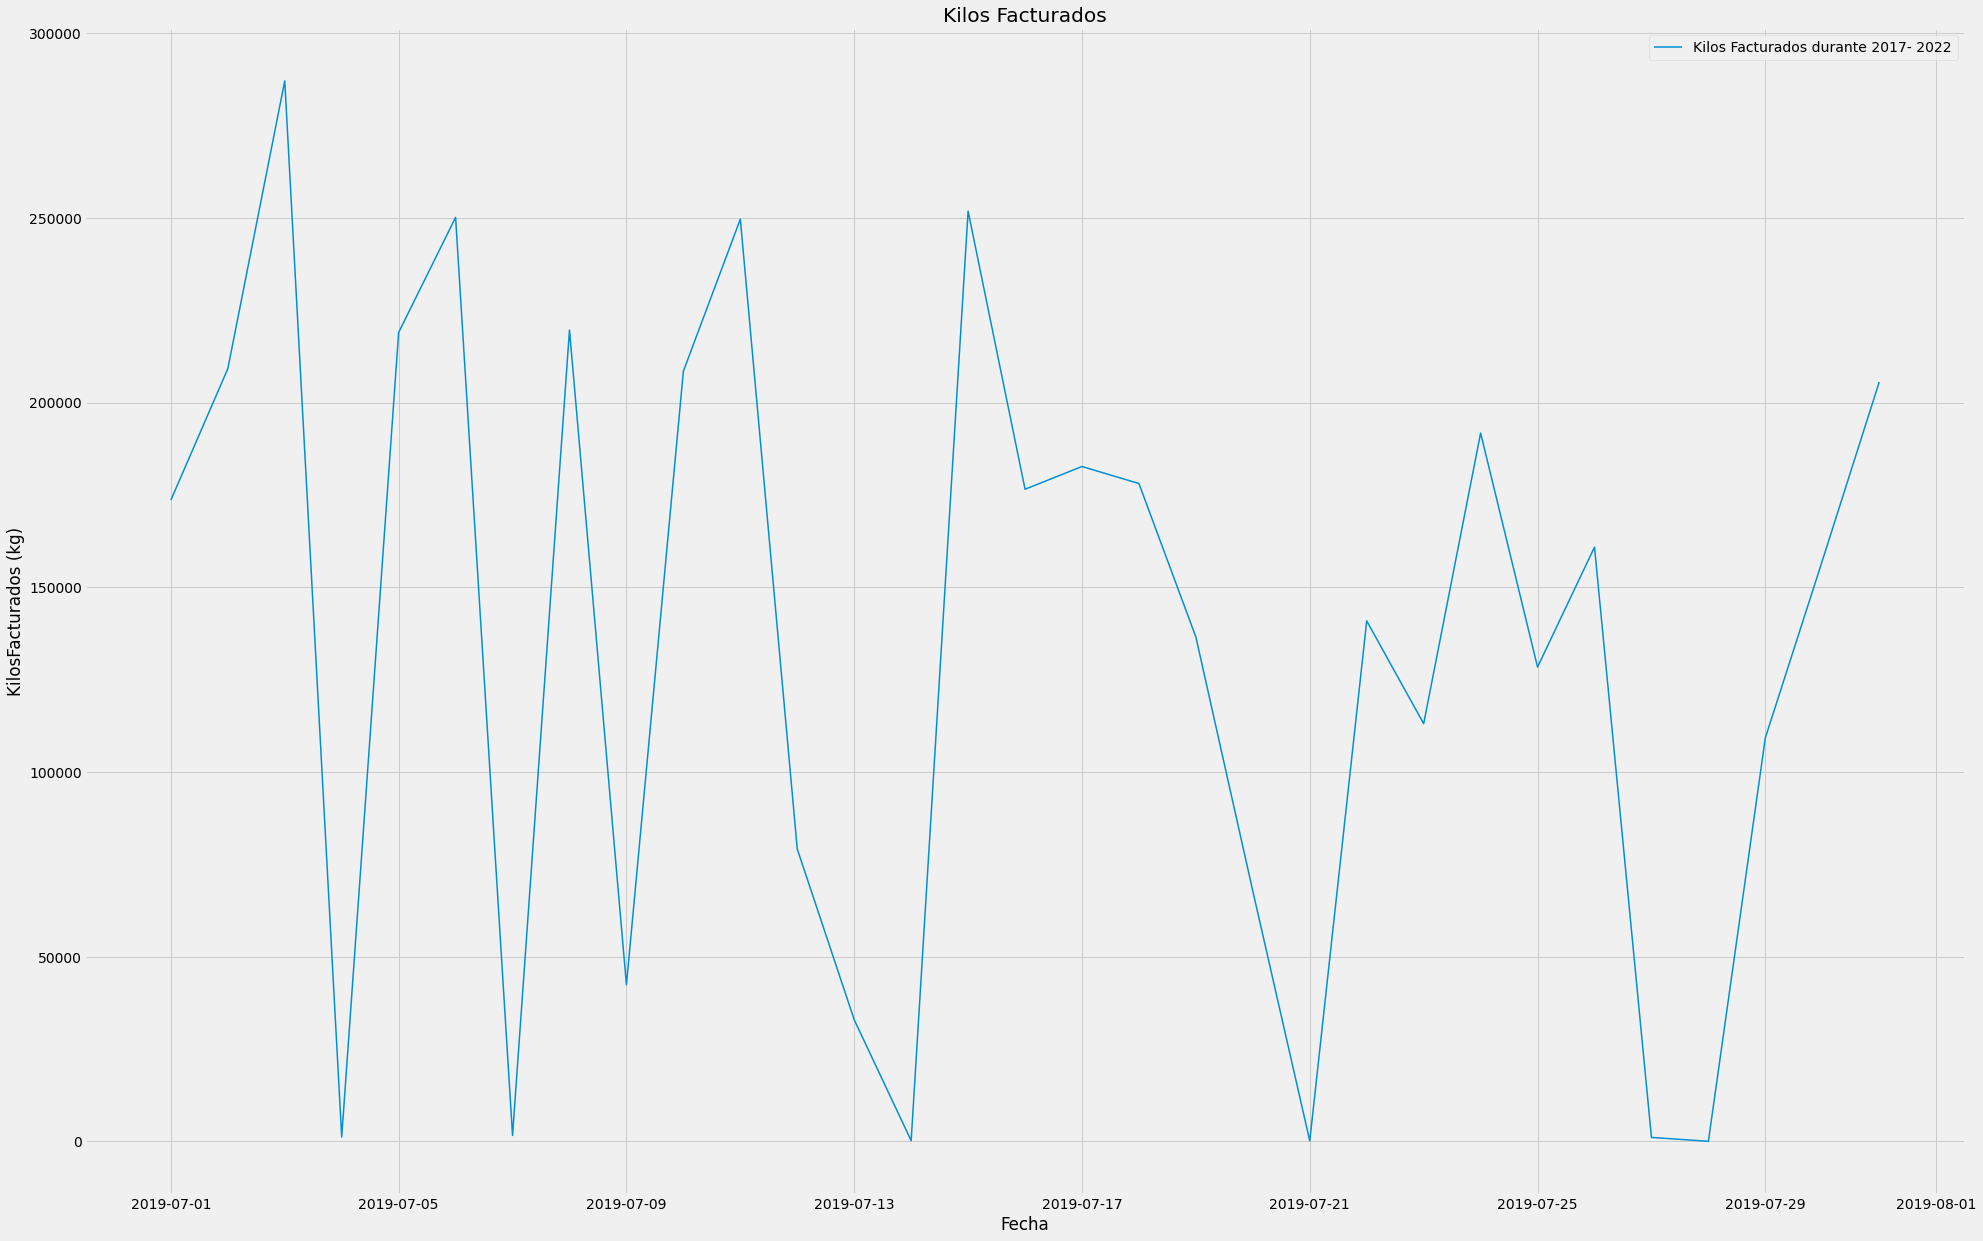

In [ ]:
fig, ax = plt.subplots(figsize=(30, 20))
ax.plot(x, y, label='Kilos Facturados durante 2017- 2022')
ax.set_xlabel('Fecha')                  
ax.set_ylabel('KilosFacturados (kg)')
ax.set_title('Kilos Facturados')
ax.legend() 

## ***6.5-Estacionalidad***

Se profundizará en la estacionalidad de los datos, utilizando seaborn para agrupar los datos por diferentes períodos de tiempo y mostrar las distribuciones de cada grupo. Primero se agrupan los datos por mes, para visualizar la estacionalidad anual.

In [ ]:
x= df_LineaProductos_fecha['Mes'].index, 
y=df_LineaProductos_fecha['Mes']
y


Fecha
2017-01-01     1
2017-02-01     2
2017-03-01     3
2017-04-01     4
2017-05-01     5
              ..
2022-11-18    11
2022-11-18    11
2022-11-18    11
2022-11-18    11
2022-11-19    11
Name: Mes, Length: 39334, dtype: int64

In [ ]:
df_LP_acum=df_LineaProductos.groupby('Anio').sum()
df_LP_acum

,Fac Impo Bruto,Costo Total Com,Fac Kilos,Comercial Kilos,Rendimiento,Precio
Anio,,,,,,
2017,2689876184,1304658568,49921844,48484090,1385217616,467325
2018,3516697123,1894106520,47058141,46078964,1622590603,618331
2019,6428335305,2984817491,48595728,47356037,3443517814,747805
2020,9630303565,5459507599,46740370,45945724,4170795966,908960
2021,15861199544,9045146453,50118103,50267733,6816053091,1049620
2022,24736851897,12309034331,51982109,48116749,12427817566,5127085


In [ ]:
df_LP_Facturacion_acum= df_LP_acum['Fac Impo Bruto'] 
df_LP_Facturacion_acum = df_LP_Facturacion_acum.sort_values(ascending=False) 
df_LP_Facturacion_acum

Anio
2022    24736851897
2021    15861199544
2020     9630303565
2019     6428335305
2018     3516697123
2017     2689876184
Name: Fac Impo Bruto, dtype: int64

Para profundizar en estos datos estadísticos, avanzaremos utilizando funciones de tiempo, agrupando por trimestre la variable 'Fac Imp Bruto'para poder ver gráficamente su estacionalidad.

In [ ]:
df_Facttrim = pd.DataFrame()
date = [datetime.datetime(2021, 1, 1) + datetime.timedelta(days=x) for x in range(0, 365)]
value = list(np.random.randint(low=0, high=100, size=365))
df_Facttrim['date'] = pd.to_datetime(date)
df_Facttrim.index = df_Facttrim['date']
df_Facttrim['value'] = value


In [ ]:
df_Facttrim.resample('Q').mean()

,value
date,
2021-03-31,48.300000
2021-06-30,52.219780
2021-09-30,50.934783
2021-12-31,46.065217


# **Conclusión:**

En un análisis de estacionalidad, observamos que el segundo y tercer trimestre registran los mayores volumenes de facturación en pesos, quedando el tercer lugar el primer trimestre. 

La estacionalidad de los productos se registra en los períodos invernales en el hemisferio sur.




# ***6.6- Remuestreo***

A menudo es útil aplicar el remuestreo en datos de series temporales a una frecuencia más baja o más alta. El remuestreo a una frecuencia más baja (submuestreo) generalmente implica una operación de recolección o sumatoria, por ejemplo, calcular la distancia recorrida por un autobús en un mes, tomando las distancias que recorrió cada día de dicho mes. El remuestreo a una frecuencia más alta (sobremuestreo) es menos común y, a menudo, implica la interpolación, aproximación u otro método de llenado de datos.

Esta sección estará centrada en el submuestreo, y cómo puede ayudar en el análisis de los datos de OPSD en varias escalas de tiempo. Se utilizará el método resample() del DataFrame, que divide el DatetimeIndex en intervalos de tiempo y agrupa los datos por intervalo de tiempo. El método resample() devuelve un objeto Resampler, similar al objeto de pandas  GroupBy. Luego se puede aplicar un método de agregación como mean() (calcula la media), median() (calcula la mediana), sum() (calcula la suma), entre otros, al grupo de datos para cada intervalo de tiempo.

In [ ]:
columnas = ['Fac Kilos','Costo Total Com','Fac Impo Bruto']
media_df_LíneaProductos_mensual= df_LineaProductos_fecha[columnas].resample('W').mean()
media_df_LíneaProductos_mensual.head(15)

,Fac Kilos,Costo Total Com,Fac Impo Bruto
Fecha,,,
2017-01-01,2745.090909,269589.181818,831442.163636
2017-01-08,4589.212766,120757.659574,437156.458967
2017-01-15,3427.044444,139744.520000,428773.542222
2017-01-22,4505.815068,75138.267123,204155.828767
2017-01-29,4694.517442,202104.610465,199735.936047
2017-02-05,7995.784091,180479.488636,384378.090909
2017-02-12,6327.757576,25775.628788,309163.166667
2017-02-19,5592.292994,59630.656051,248771.560510
2017-02-26,4772.850299,315938.353293,203672.610778


In [ ]:
opsd_anual = df_LineaProductos_fecha[columnas].resample('A').sum(min_count=360)
opsd_anual = opsd_anual.set_index(opsd_anual.index.year)
opsd_anual.head(10)

,Fac Kilos,Costo Total Com,Fac Impo Bruto
Fecha,,,
2017,49921844,1304658568,2689876184
2018,47058141,1894106520,3516697123
2019,48595728,2984817491,6428335305
2020,46740370,5459507599,9630303565
2021,50118103,9045146453,15861199544
2022,51982109,12309034331,24736851897


In [ ]:
opsd_anual.index.name='Año'
opsd_anual['Fac Impo Bruto/Fac Kilos'] = opsd_anual['Fac Impo Bruto'] / opsd_anual['Fac Kilos']
opsd_anual.tail(4)

,Fac Kilos,Costo Total Com,Fac Impo Bruto,Fac Impo Bruto/Fac Kilos
Año,,,,
2019,48595728,2984817491,6428335305,132.281902
2020,46740370,5459507599,9630303565,206.038240
2021,50118103,9045146453,15861199544,316.476455
2022,51982109,12309034331,24736851897,475.872418


# ***6.7- Tendencias***

Los datos de series temporales a menudo muestran una variabilidad lenta y gradual, además de una variabilidad de frecuencia más alta, como la estacionalidad y el ruido. Una forma fácil de visualizar estas tendencias es con medias deslizantes en diferentes escalas de tiempo.

Una media deslizante tiende a suavizar una serie temporal promediando las variaciones en frecuencias mucho más altas que el tamaño de la ventana y promediando cualquier estacionalidad en una escala de tiempo igual al tamaño de la ventana. Esto permite explorar variaciones de baja frecuencia en los datos. Dado que la serie temporal que está siendo utilizada tiene estacionalidad semanal y anual, se verán las medias deslizantes en esas dos escalas de tiempo.

se calculará la media deslizante de 365 días de los datos de OPSD.

In [ ]:
opsd_365d = df_LineaProductos_fecha[columnas].rolling(window=365,center=True,min_periods=30).mean()
opsd_365d

,Fac Kilos,Costo Total Com,Fac Impo Bruto
Fecha,,,
2017-01-01,14223.978142,354250.262295,6.113578e+05
2017-02-01,14219.146739,352324.989130,6.114505e+05
2017-03-01,14230.394595,350429.270270,6.119871e+05
2017-04-01,14272.462366,349905.408602,6.136950e+05
2017-05-01,14393.037433,348297.459893,6.194281e+05
...,...,...,...
2022-11-18,9624.245989,412994.368984,1.480064e+06
2022-11-18,9675.989247,415069.526882,1.488022e+06
2022-11-18,9728.291892,417318.016216,1.496065e+06


# ***6.8- Frecuencias***

Cuando los datos de una serie temporal están distanciados en el tiempo de forma uniforme, la serie puede asociarse con una frecuencia en pandas. Por ejemplo, con la función date_range() se creará una secuencia de fechas espaciadas uniformemente desde 2017-01-01 hasta 2017-12-21 a una frecuencia diaria.

In [ ]:

pd.to_datetime('2019-07-18')
pd.to_datetime('9/8/1993')

pd.to_datetime('9/8/1993', dayfirst=True)                                               


Timestamp('1993-08-09 00:00:00')

In [ ]:
pd.to_datetime(['2019-07-18','9/8/1993','12/15/2003'])                                                                                                                                     


DatetimeIndex(['2019-07-18', '1993-09-08', '2003-12-15'], dtype='datetime64[ns]', freq=None)

En el DatetimeIndex anterior, el tipo de datos datetime64[ns] indica que los datos subyacentes se almacenan como enteros de 64 bits, en unidades de nanosegundos (ns). Esta estructura de datos permite que pandas almacene de forma compacta grandes secuencias de valores de fecha/hora y realice operaciones vectorizadas de manera eficiente utilizando arreglos NumPy datetime64.

In [ ]:
pd.date_range('2017-01-01','2022-08-02',freq='D')                                        


DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2022-07-24', '2022-07-25', '2022-07-26', '2022-07-27',
               '2022-07-28', '2022-07-29', '2022-07-30', '2022-07-31',
               '2022-08-01', '2022-08-02'],
              dtype='datetime64[ns]', length=2040, freq='D')

El DatetimeIndex resultante tiene un atributo de frecuencia (freq) con un valor de ‘D’, que indica la frecuencia diaria.

A continuación, se revisará el DatatimeIndex de la serie de tiempo

In [ ]:
df_LineaProductos_fecha.index

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01',
               ...
               '2022-11-17', '2022-11-17', '2022-11-17', '2022-11-17',
               '2022-11-18', '2022-11-18', '2022-11-18', '2022-11-18',
               '2022-11-18', '2022-11-19'],
              dtype='datetime64[ns]', name='Fecha', length=39334, freq=None)

Se puede ver que no tiene frecuencia (freq=None). Esto tiene sentido, ya que el índice se creó a partir de una secuencia de fechas en el archivo CSV, sin especificar frecuencia para la serie temporal

# **7. Pronóstico de series temporales**

Una vez que tenemos confirmado que nuestra serie es estacionaria, podemos hacer pronóstico. Existen diversos métodos para hacer pronóstico. 



In [ ]:
df_LineaProductos.describe()

,Anio,Fac Impo Bruto,Costo Total Com,Fac Kilos,Comercial Kilos,Rendimiento,Precio
count,39334.000000,3.933400e+04,3.933400e+04,39334.000000,3.933400e+04,3.933400e+04,39334.000000
mean,2019.166141,1.598191e+06,8.388994e+05,7485.033177,7.277401e+03,7.592920e+05,226.753597
std,1.738207,4.305349e+06,4.327912e+06,16991.310990,3.707081e+04,5.236676e+06,505.035699
min,2017.000000,0.000000e+00,-1.098530e+07,0.000000,-1.374750e+06,-1.675633e+08,0.000000
25%,2018.000000,2.852000e+03,0.000000e+00,25.000000,0.000000e+00,-2.080750e+03,51.000000
50%,2019.000000,6.018650e+04,8.017500e+03,505.000000,1.200000e+02,1.212100e+04,92.000000
75%,2021.000000,1.010698e+06,1.672308e+05,5834.500000,2.000000e+03,4.663802e+05,225.000000
max,2022.000000,8.165910e+07,1.859240e+08,211249.000000,1.374699e+06,8.134183e+07,8753.000000


Para hacer esta transformación usaré una función llamada series_to_supervised(). 

Antes de usar la función, utilizamos el MinMaxScaler para transformar el rango de nuestros valores entre -1 y 1 (pues sabemos que a nuestra red neuronal, le favorece para realizar los cálculos).

Entonces aqui vemos cómo queda nuestro set de datos de entrada.

# **8. Limpieza de dataset**

En primera instancia se evaluó la serie de datos identificando los datos faltantes para una serie de tiempo, posteriormente se identifico aquellos productos que no eran relevantes para el análisis y se realizó la depuración de la base.

En segunda instancia, se agregarón los datos faltantes para la serie de tiempo.

La base de datos no cuenta con datos nulos o duplicados, ya que la base se depura desde el comienzo, además al ser una serie de tiempo y de venta de productos, por lo cual es díficil que cuente con estas anomalías.


En una tercera instancia de limpieza del dataset, se avanzo con el retiro de variables que no aportaban análisis signiticativo. Por otra parte, se agregaron 2 columnas calculadas: 1- Rendimiento = Fact Impo Bruto - Costo Total Com y 2- Precio= Fact Impo Bruto/ Kilos Fac. Ambas variables calculadas se irán trabajando en futuros análisis.


In [ ]:
Proddepurados = '/content/3.Base Prod por canal de distrib - Silvana Tomsig - Sebastián de León.csv'
df_Proddepurados = pd.read_csv(Proddepurados,index_col=0, encoding='latin-1', sep=";")
df_Proddepurados.head()

,Línea Unificada,Canal de distribución,Anio,Mes,Fecha,Fac Impo Bruto,Costo Total Com,Fac Kilos,Comercial Kilos,Rendimiento,Precio
Linea,,,,,,,,,,,
YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,1/1/2017,112715,0,660,0,112715,171
YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,2/1/2017,418049,20107,9990,20050,397942,42
YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,3/1/2017,741792,19313,18275,-7540,722479,41
YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,4/1/2017,1647618,-456,39380,-685,1648074,42
YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,5/1/2017,2437267,96214,59140,-2125,2341053,41


# **8.1. Datos desaparecidos** 

Antes de tratar los datos faltantes, es importante determinar su prevalencia y su aleatoriedad, ya que pueden implicar una reducción del tamaño de la muestra. También hay que asegurarse que la gestión de los datos desaparecidos no esté sesgada o esconda una verdad incómoda.

In [ ]:
total = df_Proddepurados.isnull().sum().sort_values(ascending = False)
percent = (df_Proddepurados.isnull().sum() / df_Proddepurados.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Línea Unificada,0,0.0
Canal de distribución,0,0.0
Anio,0,0.0
Mes,0,0.0
Fecha,0,0.0
Fac Impo Bruto,0,0.0
Costo Total Com,0,0.0
Fac Kilos,0,0.0
Comercial Kilos,0,0.0
Rendimiento,0,0.0


De este análisis surge que no existen datos desaparecidos para el dataset, y que no tiene sesgo para este punto.

# **8.2. Datos atípicos**

Los datos atípicos u outliers pueden afectar marcadamente el modelo, además de suponer una fuente de información en sí misma. Su tratamiento es un asunto complejo que requiere más atención.

***a- Análisis univariable***

La primera tarea en este caso es establecer un umbral que defina una observación como valor atípico. Para ello voy a estandarizar los datos, es decir, transformar los valores datos para que tengan una media de 0 y una desviación estándar de 1.

In [ ]:
Facturacion_scaled = StandardScaler().fit_transform(df_Proddepurados['Fac Impo Bruto'][:,np.newaxis]);
low_range = Facturacion_scaled[Facturacion_scaled[:,0].argsort()][:10]
high_range = Facturacion_scaled[Facturacion_scaled[:,0].argsort()][-10:]
print('Fuera de la distribución (por debajo):')
print(low_range)
print('\nFuera de la distribución (por arriba):')
print(high_range)

Fuera de la distribución (por debajo):
[[-0.37121537]
 [-0.37121537]
 [-0.37121537]
 [-0.37121537]
 [-0.37121537]
 [-0.37121537]
 [-0.37121537]
 [-0.37121537]
 [-0.37121537]
 [-0.37121537]]

Fuera de la distribución (por arriba):
[[13.27286046]
 [13.38338368]
 [14.15470885]
 [14.66276609]
 [14.91701513]
 [14.92467942]
 [15.20914498]
 [15.52183323]
 [17.19487722]
 [18.59591914]]


* Los valores bajos son similares y no muy alejados del 0.
* Los valores altos están muy alejados del 0. Los valores superiores a 19 están realmente fuera de rango.

***b- Análisis bivariable***



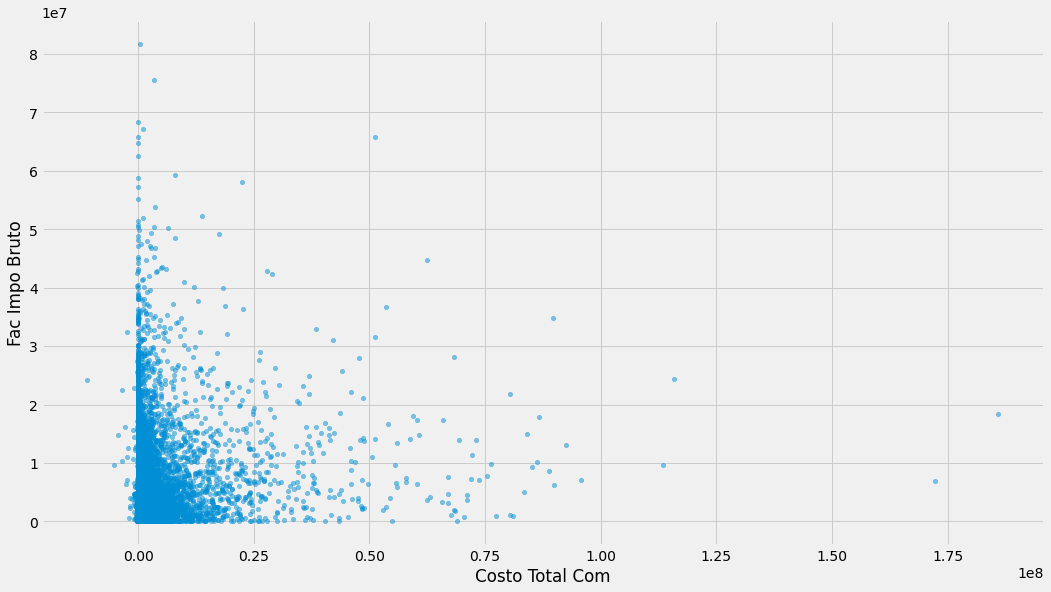

In [ ]:
var = 'Costo Total Com'
data = pd.concat([df_Proddepurados['Fac Impo Bruto'], df_Proddepurados[var]], axis = 1)
data.plot.scatter(x = var, y = 'Fac Impo Bruto', alpha = 0.5);

Aunque se pueden observar algunos valores bastante extremos, parece que conservan la tendencia, por lo que voy a mantenerlos.

# **9. Obtención de Insights**

Para entender realmente el conjunto de datos, se  estudia el significado y la relevancia de cada variable con respecto al problema. Intentará responder a diversas cuestiones sobre ellas, como:

* La relevancia de la variable facturación y costos por línea de producto y/o cadena.
* La importancia de las variables.
* Solapamiento con otras variables.


In [ ]:
InfusionesyOtros= '/content/3.Base Prod por canal de distrib - Silvana Tomsig - Sebastián de León.csv'
df_InfusionesyOtros=pd.read_csv(InfusionesyOtros,index_col=0, encoding='latin-1', sep=";")
df_InfusionesyOtros.head(10)

,Línea Unificada,Canal de distribución,Anio,Mes,Fecha,Fac Impo Bruto,Costo Total Com,Fac Kilos,Comercial Kilos,Rendimiento,Precio
Linea,,,,,,,,,,,
YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,1/1/2017,112715,0,660,0,112715,171
YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,2/1/2017,418049,20107,9990,20050,397942,42
YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,3/1/2017,741792,19313,18275,-7540,722479,41
YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,4/1/2017,1647618,-456,39380,-685,1648074,42
YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,5/1/2017,2437267,96214,59140,-2125,2341053,41
YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,6/1/2017,21909,18404,540,-1755,3505,41
YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,9/1/2017,220693,25639,5080,10220,195054,43
YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,10/1/2017,1270074,-9864,30975,-6460,1279938,41
YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,11/1/2017,323032,11677,7815,-12335,311355,41


En este punto, se muestra las columnas del csv para poder identificar las variables objetivos.

In [ ]:
df_InfusionesyOtros.columns

Index(['Línea Unificada', 'Canal de distribución', 'Anio', 'Mes', 'Fecha',
       'Fac Impo Bruto', 'Costo Total Com', 'Fac Kilos', 'Comercial Kilos',
       'Rendimiento', 'Precio'],
      dtype='object')

# ***9.1. Análisis univariable***

1. La variable 'Fac Impo Bruto' es una de las variables objetivo de este conjunto de datos, por lo que se estudiará con mayor detenimiento:


In [ ]:
df_InfusionesyOtros['Fac Impo Bruto'].describe()

count    3.933400e+04
mean     1.598191e+06
std      4.305349e+06
min      0.000000e+00
25%      2.852000e+03
50%      6.018650e+04
75%      1.010698e+06
max      8.165910e+07
Name: Fac Impo Bruto, dtype: float64

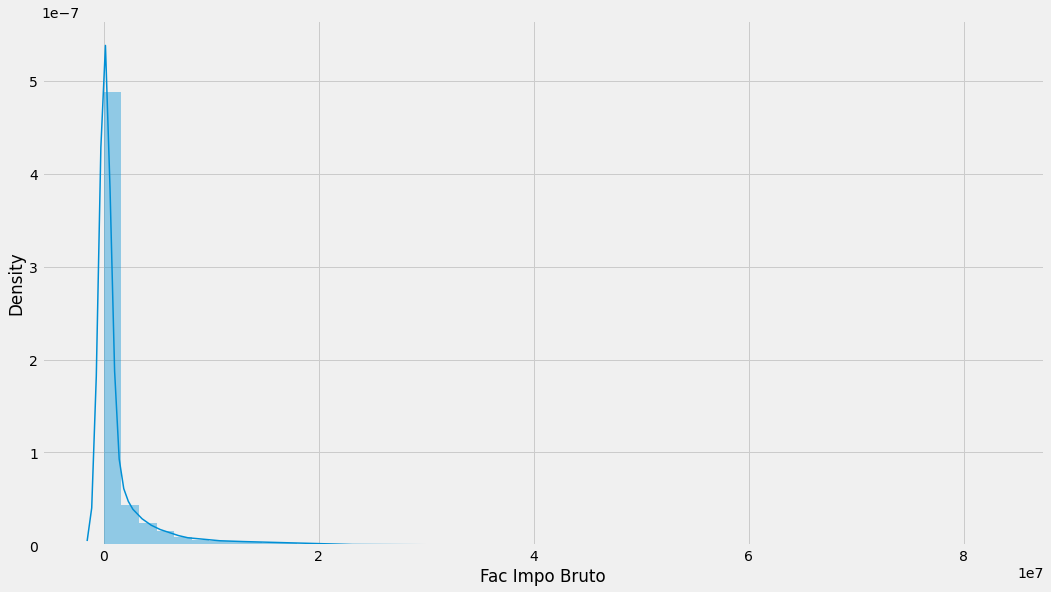

In [ ]:
sns.distplot(df_InfusionesyOtros['Fac Impo Bruto']);

A simple vista se pueden apreciar:

- Una desviación con respecto a la distribución normal.
- Una asimetría positiva.
- Algunos picos.

In [ ]:
print("Skewness: %f" % df_InfusionesyOtros['Fac Impo Bruto'].skew())
print("Kurtosis: %f" % df_InfusionesyOtros['Fac Impo Bruto'].kurt())

Skewness: 5.490285
Kurtosis: 44.170746


2. La variable 'Rendimiento' es una de las variables objetivo de este conjunto de datos, por lo que se estudiará con mayor detenimiento:

In [ ]:
df_InfusionesyOtros['Rendimiento'].describe()

count    3.933400e+04
mean     7.592920e+05
std      5.236676e+06
min     -1.675633e+08
25%     -2.080750e+03
50%      1.212100e+04
75%      4.663802e+05
max      8.134183e+07
Name: Rendimiento, dtype: float64

Al analizar la variable calculada Rendimiento, que es la diferencia entre Facturación y Costos, muestra que la diferencia entre las líneas de productos tiene rendimientos negativos, con lo cual las desviaciones estadisticas irán -1 a 1

**a- Relación con variables numéricas**

* Diagrama de dispersión Costo Total Com/Fac Impo Bruto:

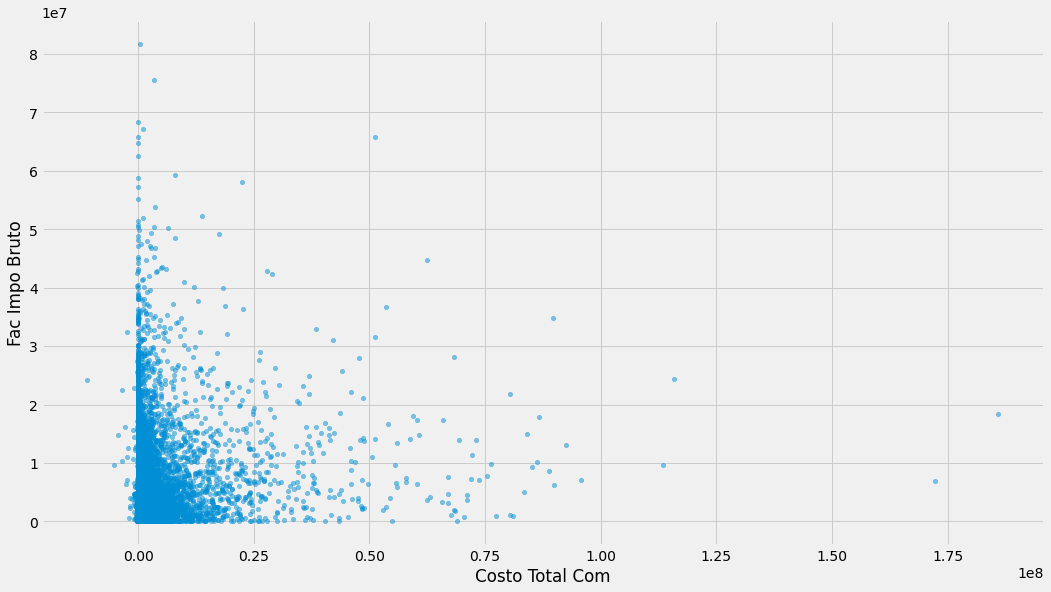

In [ ]:
var = 'Costo Total Com'
data = pd.concat([df_InfusionesyOtros['Fac Impo Bruto'], df_InfusionesyOtros[var]], axis=1)
data.plot.scatter(x=var, y='Fac Impo Bruto', alpha = 0.5);


* Diagrama de dispersión Fac Kilos/Fac Impo Bruto

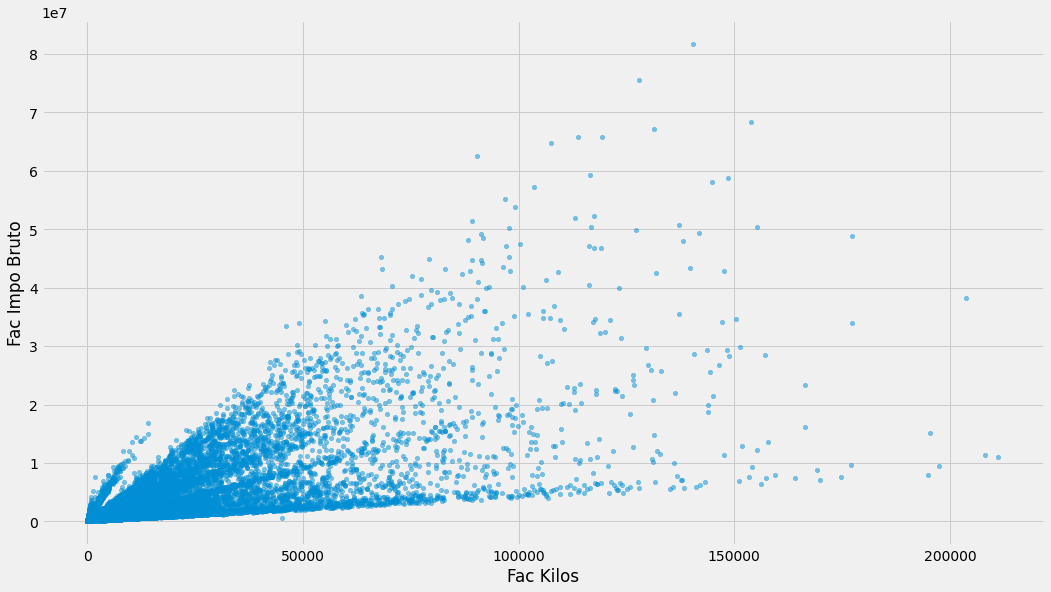

In [ ]:
var = 'Fac Kilos'
data = pd.concat([df_InfusionesyOtros['Fac Impo Bruto'], df_InfusionesyOtros[var]], axis=1)
data.plot.scatter(x=var, y='Fac Impo Bruto', alpha = 0.5);

Diagrama de dispersión Rendimiento/Fac Impo Brut

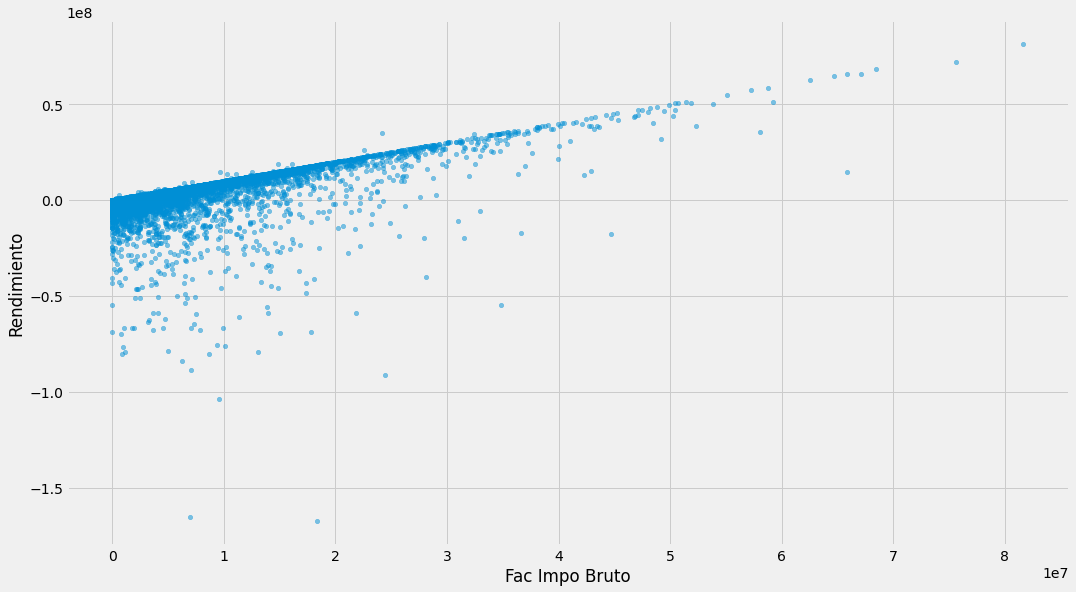

In [ ]:
var = 'Fac Impo Bruto'
data = pd.concat([df_InfusionesyOtros['Rendimiento'], df_InfusionesyOtros[var]], axis=1)
data.plot.scatter(x=var, y='Rendimiento', alpha = 0.5);

**b- Relación con variables categóricas**

* Diagrama de cajas Año/Fac Impo Bruto:

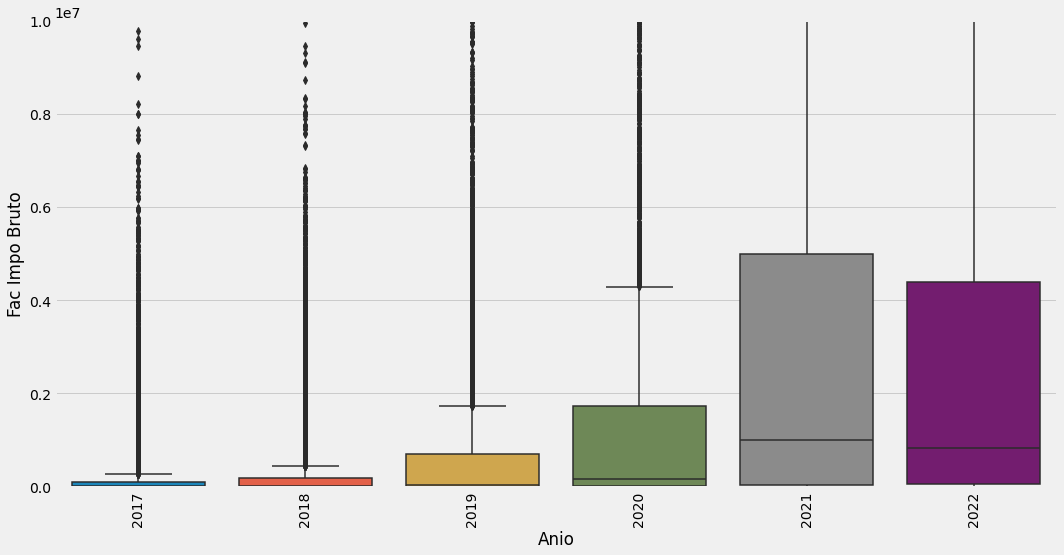

In [ ]:
var = 'Anio'
data = pd.concat([df_InfusionesyOtros['Fac Impo Bruto'], df_InfusionesyOtros[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Fac Impo Bruto", data=data)
fig.axis(ymin=0, ymax=10000000);
plt.xticks(rotation=90);

* Diagrama de cajas Año/Rendimiento:

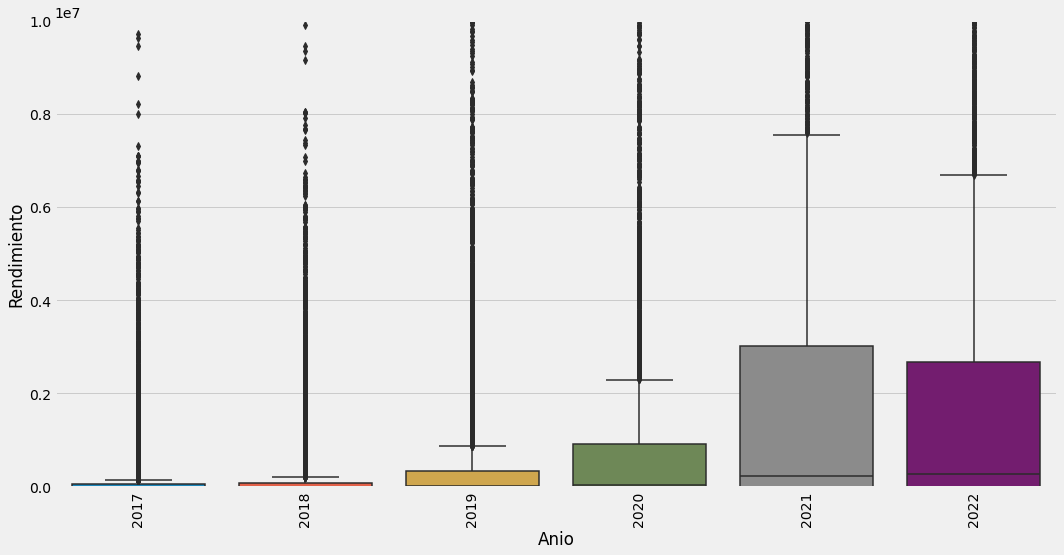

In [ ]:
var = 'Anio'
data = pd.concat([df_InfusionesyOtros['Rendimiento'], df_InfusionesyOtros[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="Rendimiento", data=data)
fig.axis(ymin=0, ymax=10000000);
plt.xticks(rotation=90);

***Resumiendo***:

a- 'Costo Total Com' y 'Fac Kilos' mantienen una relación lineal positiva con 'Fac Impo Bruto', aumentando en el mismo sentido. En el caso de 'Fac Kilos', la pendiente de esta relación es muy acentuada.


b- 'Anio' también parece relacionada con 'Fac Impo Bruto' fuerte, tal y como se puede observar en los diagramas de cajas.

c- 'Rendimiento' es una variable calculada entre 'Fac Impo Bruto' y 'Costo Total Com', la misma tiene valores negativos lo que hace que su dispersión varie entre -1 a 1. 

Sólo he explorado tres variables, pero hay muchas otras a analizar.

# ***9.2. Análisis multivariable***

Hasta ahora sólo se realizó el análisis de las variables que se ha creído importantes. Es hora de un análisis más objetivo.

Para ello se va realizar las siguientes pruebas de correlación:

* Matriz de correlación general.
* Matriz de correlación centrada en la variable 'Fac Impo Bruto'.
* Diagramas de dispersión entre las variables más correladas.

***a-Matriz de correlación (en forma de mapa de calor)***

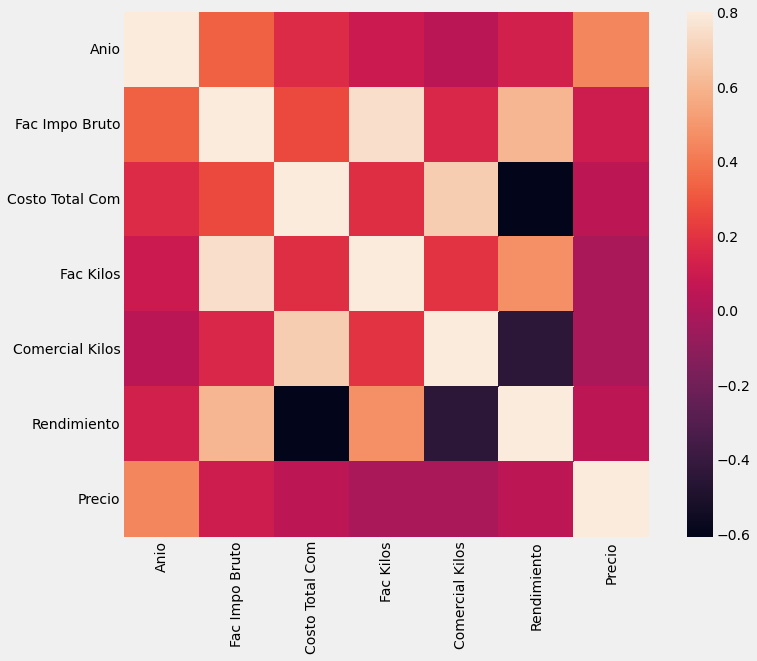

In [ ]:
corrmat = df_InfusionesyOtros.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

El mapa de calor es una forma visual muy útil para para conocer las variables y sus relaciones. A primera vista hay dos variables que llaman la atención: 'Fac Kilos' y 'Comercial Kilos', seguidas por las variables 'Costo Total Com'. En ambos casos parece haber una correlación significativa; en realidad es tan fuerte que podría indicar multicolinealidad, es decir, que básicamente ofrecen la misma información.

Con respecto a las correlaciones de la variable 'Fac Impo Bruto', destacan las vistas anteriormente ('Costo Total Com', 'Fac Kilos' y 'Anio'), pero hay otras que también deberían ser tenidas en cuenta.

***b- Matriz de correlación de 'Fac Impo Bruto'***

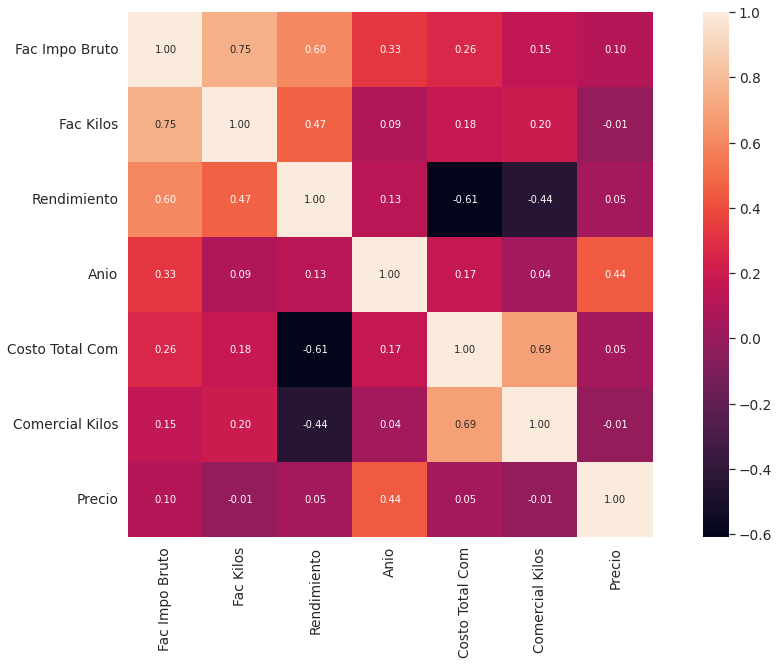

In [ ]:
k = 10 
cols = corrmat.nlargest(k, 'Fac Impo Bruto')['Fac Impo Bruto'].index
cm = np.corrcoef(df_InfusionesyOtros[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size': 10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

In [ ]:
corr = df_InfusionesyOtros.corr()
corr[['Fac Impo Bruto']].sort_values(by = 'Fac Impo Bruto',ascending = False).style.background_gradient()

,Fac Impo Bruto
Fac Impo Bruto,1.000000
Fac Kilos,0.754324
Rendimiento,0.603839
Anio,0.326897
Costo Total Com,0.264155
Comercial Kilos,0.154419
Precio,0.104310


En estas matrices de correlación se puede observar:

'Fac Kilos' y 'Rendimiento' está fuertemente correlacionada con 'Fac Impo Bruto'.

In [ ]:
corr = df_InfusionesyOtros.corr()
corr[['Rendimiento']].sort_values(by = 'Rendimiento',ascending = False).style.background_gradient()

,Rendimiento
Rendimiento,1.000000
Fac Impo Bruto,0.603839
Fac Kilos,0.469989
Anio,0.127732
Precio,0.047256
Comercial Kilos,-0.440173
Costo Total Com,-0.609286


Al analizar la correlación de la variable 'Rendimiento' se visualiza que posee una correlación positiva con 'Fac Impo Bruto', a medida que se incremente una de las variables la otra incrementará; y negativa con 'Costo Total Com', es decir mientras una se incremente la otra variable disminuirá.

# **9.3. Comprobación de normalidad**

En este momento, hay que comprobar cuatro suposiciones fundamentales:

* Normalidad - Cuando hablamos de normalidad lo que queremos decir es que los datos deben parecerse a una distribución normal. Es importante porque varias pruebas estadísticas se basan en esta suposición. Sólo voy a comprobar la normalidad de la variable 'Fac Impo Bruto', aunque resulte un tanto limitado ya que no asegura la normalidad multivariable. Además, si resolvemos la normalidad evitamos otros problemas, como la homocedasticidad.

* Homocedasticidad - La homocedasticidad se refiere a la suposición de que las variables dependientes tienen el mismo nivel de varianza en todo el rango de las variables predictoras. La homocedasticidad es deseable porque queremos que el término de error sea el mismo en todos los valores de las variables independientes.

* Linealidad- La forma más común de evaluar la linealidad es examinar los diagramas de dispersión y buscar patrones lineales. Si los patrones no son lineales, valdría la pena explorar las transformaciones de datos. Sin embargo, no voy a entrar en esto porque la mayoría de los gráficos de dispersión que hemos visto parecen tener relaciones lineales.

* Ausencia de errores correlacionados - Esto ocurre a menudo en series temporales, donde algunos patrones están relacionados en el tiempo. Tampoco voy a tocar este asunto.



***a- En búsqueda de la normalidad***

El objetivo es estudiar la variable 'Fac Impo Bruto' de forma fácil, comprobando:

- Histograma 
- Curtosis y asimetría.
- Gráfica de probabilidad normal 
- La distribución de los datos debe ajustarse a la diagonal que representa la distribución normal.

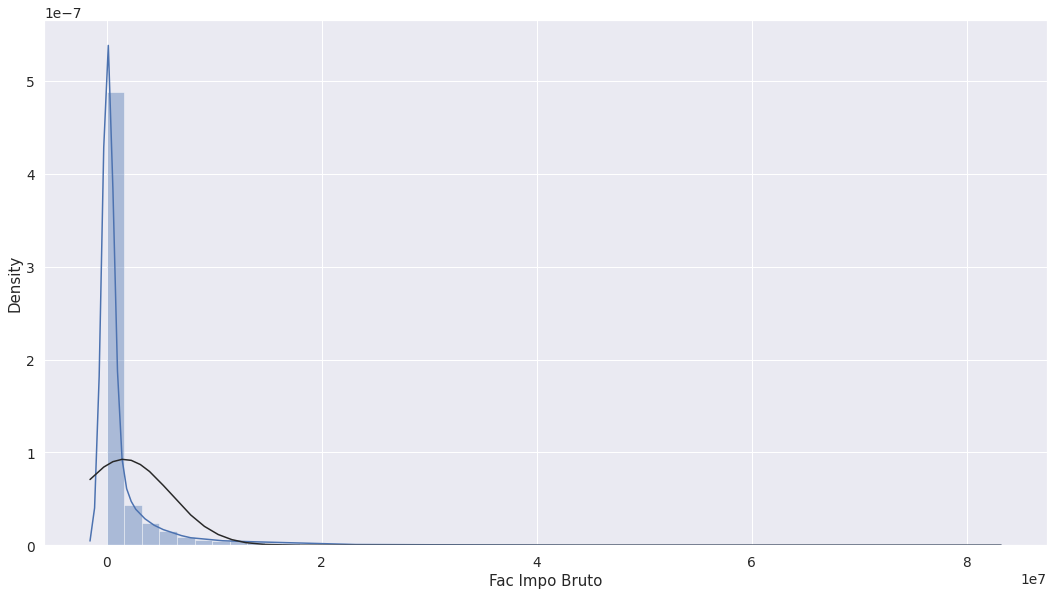

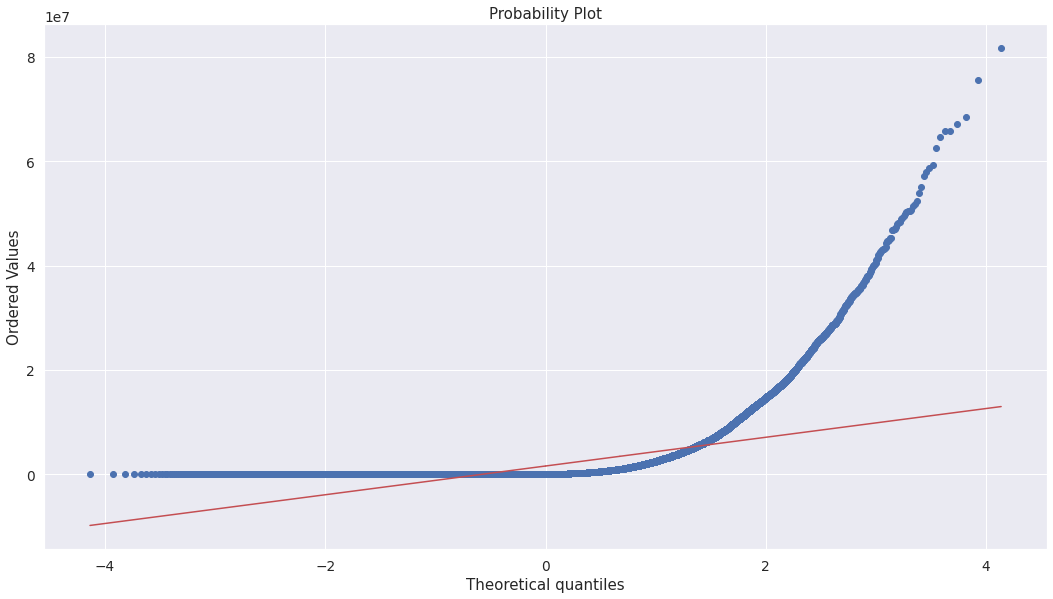

In [ ]:
sns.distplot(df_InfusionesyOtros['Fac Impo Bruto'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_InfusionesyOtros['Fac Impo Bruto'], plot = plt)

De estos gráficos se desprende que 'Fac Impo Bruto' no conforma una distribución normal, presenta similitud a una Chi Cuadrado. Muestra picos, asimetría positiva y no sigue la línea diagonal.

Terminado el trabajo con 'Fac Impo Bruto', voy a seguir con 'Costo Total Com'.

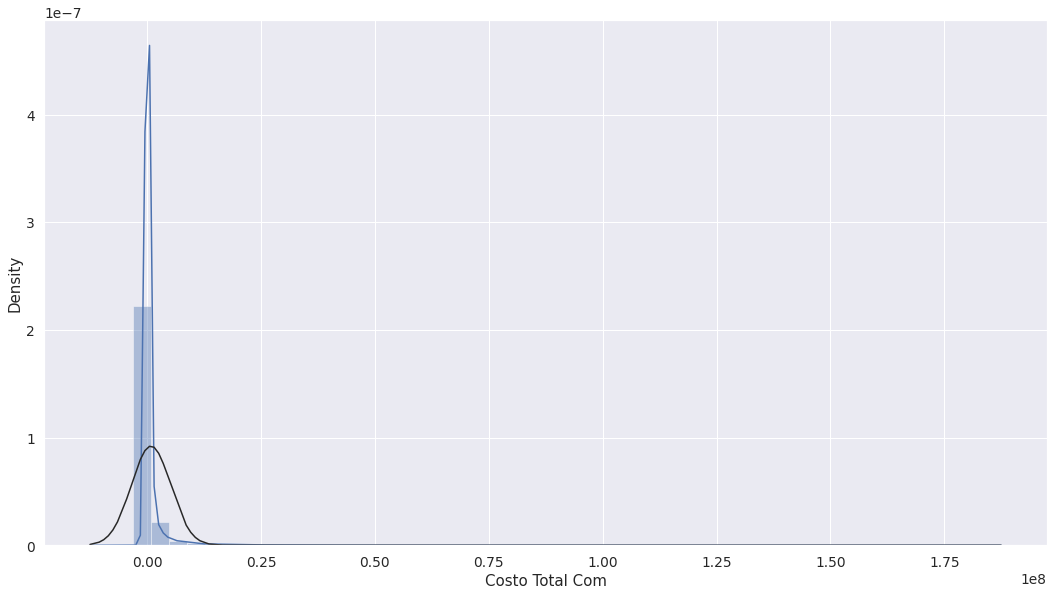

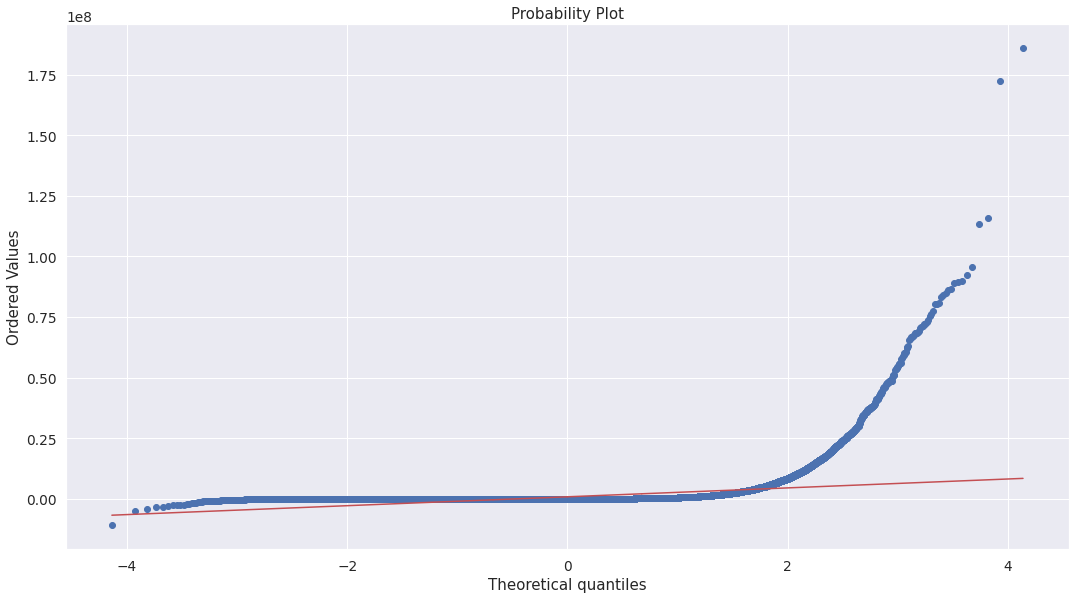

In [ ]:
sns.distplot(df_InfusionesyOtros['Costo Total Com'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_InfusionesyOtros['Costo Total Com'], plot = plt)

La variable 'Costo Total Com' muestra asimetría, al igual que la variable 'Fac Impo Bruto' muestra una similitud con una distribución del tipo Chi cuadrado. Sus picos son asimetricamente positivos y no conitnuan con la recta diagonal.

Continuamos con la variable 'Rendimiento'

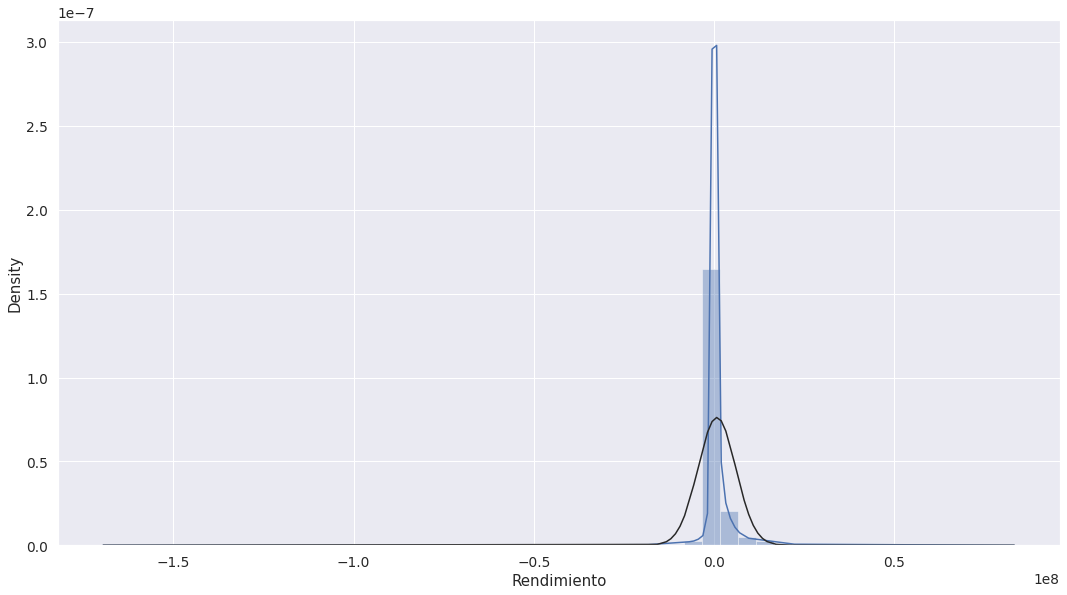

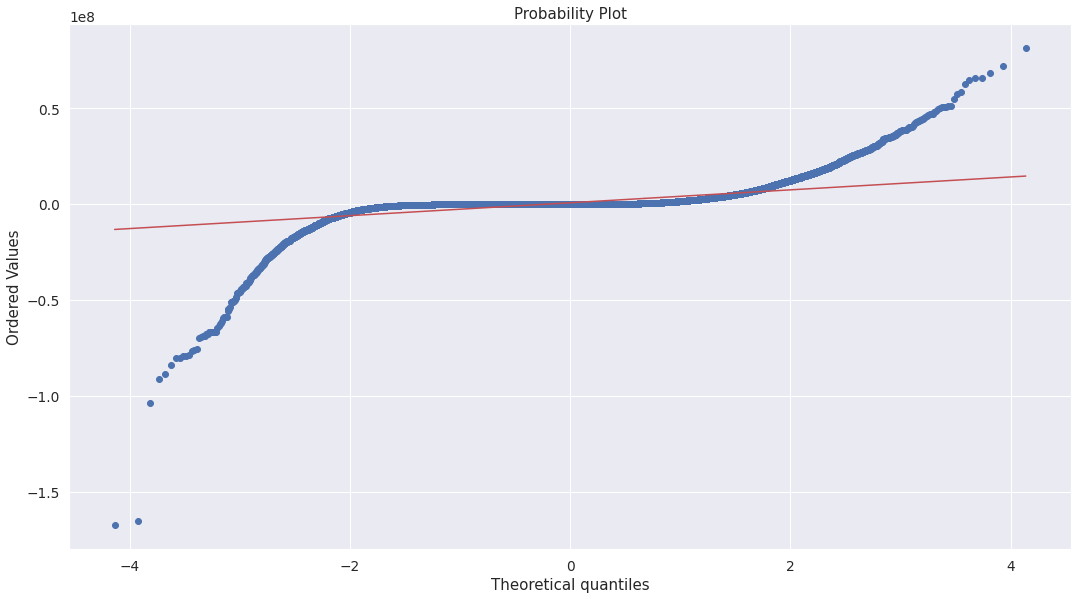

In [ ]:
sns.distplot(df_InfusionesyOtros['Rendimiento'], fit = norm);
fig = plt.figure()
res = stats.probplot(df_InfusionesyOtros['Rendimiento'], plot = plt)

***b- En búsqueda de la homocedasticidad***

El mejor método para probar la homocedasticidad para dos variables métricas es de forma gráfica. Las desviaciones de una dispersión uniforme se muestran mediante formas tales como conos (pequeña dispersión a un lado del gráfico, gran dispersión en el lado opuesto) o diamantes (un gran número de puntos en el centro de la distribución).

Empiezo por 'Fac Impo Bruto' y 'Costo Total Com'.

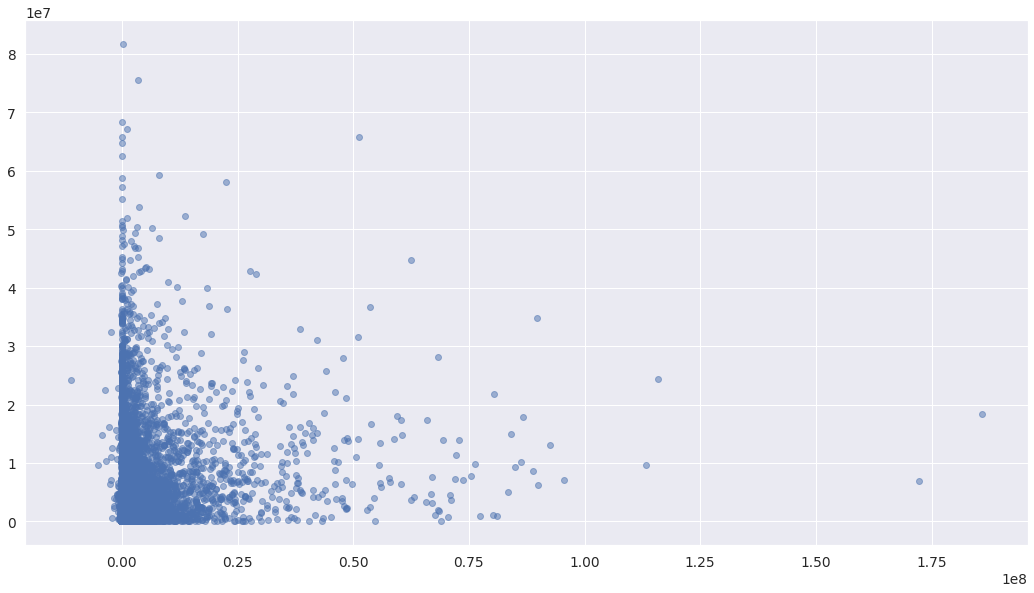

In [ ]:
plt.scatter(df_InfusionesyOtros['Costo Total Com'], df_InfusionesyOtros['Fac Impo Bruto'], alpha = 0.5);

En este caso las variables de estudio muestran una forma triángular.

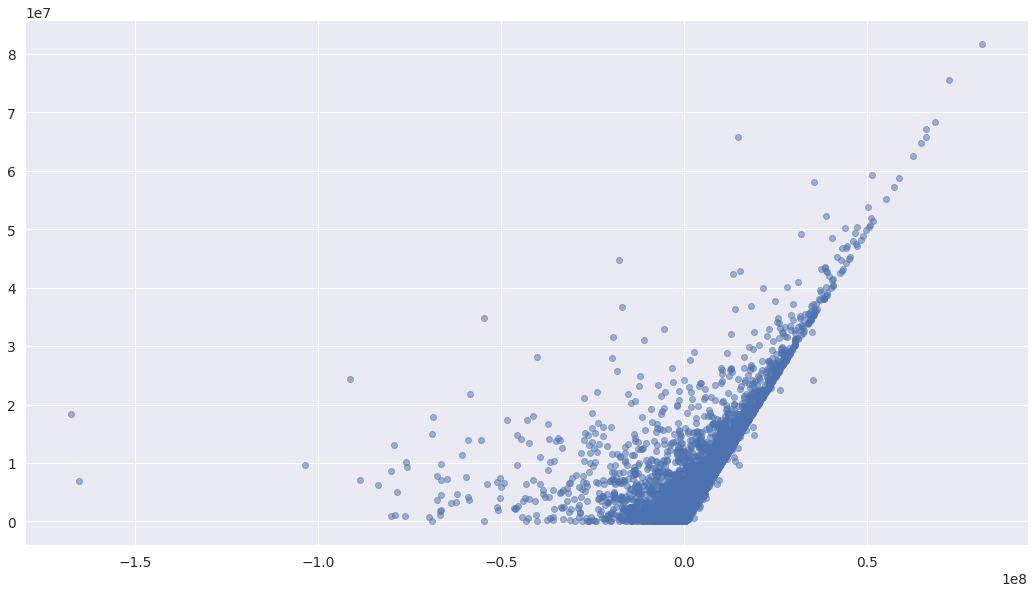

In [ ]:
plt.scatter(df_InfusionesyOtros['Rendimiento'], df_InfusionesyOtros['Fac Impo Bruto'], alpha = 0.5);

En el caso de las variables 'Rendimiento' y'Fact Impo Bruto', la primer variable es parte del cálculo de la segunda variable, por lo cual es esperable que exista relación directa entre ambas.

# **10. Entrenando un algoritmo de Machine Learning**

Una serie de tiempo es una sucesión de datos ordenados cronológicamente, espaciados a intervalos iguales o desiguales. El proceso de forecasting consiste en predecir el valor futuro de una serie de tiempo, bien modelando la serie únicamente en función de su comportamiento pasado (autorregresivo) o empleando otras variables externas.


Avanzando con la funcionalidad del modelo, se toma como base la variable Facturación en pesos, sin discriminar producto o cadena de distribución.  

***a- Datos***

*a.1- Fechas*

En puntos anteriores se trabajo con la función datatime(), con lo cuál se transformo las fechas en datos índices. Dado que los datos son diarios, unificaremos el formato.

Se destaca que la base se ha ampliado hasta el 19 de noviembre de 2022. Para evitar modificar los puntos anteriores se decide importar nuevamente la base, es de nuestro conocimiento que **no es una buena práctica y consume muchos recursos al momento de hacerlo**, cómo bien hemos dicho en frases anteriores, en este caso queremos evitar que los desarrollos anteriores se vean afectados con la nueva información añadida.


In [ ]:
Prod= '/content/3.Base Prod por canal de distrib - Silvana Tomsig - Sebastián de León.csv'
df_Prod=pd.read_csv(Prod,index_col=0, encoding='latin-1', sep=";")
df_Prod.head(10)

,Línea Unificada,Canal de distribución,Anio,Mes,Fecha,Fac Impo Bruto,Costo Total Com,Fac Kilos,Comercial Kilos,Rendimiento,Precio
Linea,,,,,,,,,,,
YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,1/1/2017,112715,0,660,0,112715,171
YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,2/1/2017,418049,20107,9990,20050,397942,42
YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,3/1/2017,741792,19313,18275,-7540,722479,41
YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,4/1/2017,1647618,-456,39380,-685,1648074,42
YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,5/1/2017,2437267,96214,59140,-2125,2341053,41
YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,6/1/2017,21909,18404,540,-1755,3505,41
YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,9/1/2017,220693,25639,5080,10220,195054,43
YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,10/1/2017,1270074,-9864,30975,-6460,1279938,41
YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,11/1/2017,323032,11677,7815,-12335,311355,41


In [ ]:
df_Prod_fecha = pd.read_csv(Prod,index_col=5, encoding='latin-1', sep=";",parse_dates=True)
df_Prod_fecha.index


DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-09-01', '2017-10-01',
               '2017-11-01', '2017-12-01',
               ...
               '2022-11-17', '2022-11-17', '2022-11-17', '2022-11-17',
               '2022-11-18', '2022-11-18', '2022-11-18', '2022-11-18',
               '2022-11-18', '2022-11-19'],
              dtype='datetime64[ns]', name='Fecha', length=39334, freq=None)

In [ ]:
df_Prod_fecha.head()

,Linea,Línea Unificada,Canal de distribución,Anio,Mes,Fac Impo Bruto,Costo Total Com,Fac Kilos,Comercial Kilos,Rendimiento,Precio
Fecha,,,,,,,,,,,
2017-01-01,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,112715,0,660,0,112715,171
2017-02-01,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,418049,20107,9990,20050,397942,42
2017-03-01,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,741792,19313,18275,-7540,722479,41
2017-04-01,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,1647618,-456,39380,-685,1648074,42
2017-05-01,YERBA MATE BCP,Yerba Mate,Cadenas de Supermercados,2017,Enero,2437267,96214,59140,-2125,2341053,41


In [ ]:
df_Prod_fecha.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 39334 entries, 2017-01-01 to 2022-11-19
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Linea                  39334 non-null  object
 1   Línea Unificada        39334 non-null  object
 2   Canal de distribución  39334 non-null  object
 3   Anio                   39334 non-null  int64 
 4   Mes                    39334 non-null  object
 5   Fac Impo Bruto         39334 non-null  int64 
 6   Costo Total Com        39334 non-null  int64 
 7   Fac Kilos              39334 non-null  int64 
 8   Comercial Kilos        39334 non-null  int64 
 9   Rendimiento            39334 non-null  int64 
 10  Precio                 39334 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 3.6+ MB


In [ ]:
df_PD = df_Prod_fecha.groupby(df_Prod_fecha.index).sum()
df_PD


,Anio,Fac Impo Bruto,Costo Total Com,Fac Kilos,Comercial Kilos,Rendimiento,Precio
Fecha,,,,,,,
2017-01-01,110935,45729319,14827405,150980,93303,30901914,8976
2017-01-02,74629,16095174,594856,342391,14253,15500318,3428
2017-01-03,84714,16970121,3873147,286988,74302,13096974,4919
2017-01-04,123037,26131707,2653351,112527,23654,23478356,9766
2017-01-05,112952,28024603,7309649,107193,58726,20714954,8719
...,...,...,...,...,...,...,...
2022-12-07,28308,110508819,8745314,226033,34333,101763505,6232
2022-12-08,93012,195543418,20903378,348633,60849,174640040,58553
2022-12-09,68748,141580736,17770047,253566,104877,123810689,40438


***a.2- Armado de modelo***

Para avanzar se armará un modelo para entrenar con los primeros alogartirmos.

*1- DataFrame con la variable Facturación*

In [ ]:
x = df_PD.index

y = df_PD['Fac Impo Bruto']

y

Fecha
2017-01-01     45729319
2017-01-02     16095174
2017-01-03     16970121
2017-01-04     26131707
2017-01-05     28024603
                ...    
2022-12-07    110508819
2022-12-08    195543418
2022-12-09    141580736
2022-12-10    135127244
2022-12-11     17094529
Name: Fac Impo Bruto, Length: 2149, dtype: int64

*2- Separación en train y test*


In [ ]:
FAC = y

In [ ]:
y_index = FAC.index
date_train = int(len(y_index)*0.99)

y_train = FAC[y_index[:date_train]]
y_test = FAC[y_index[date_train:len(y_index)]]

In [ ]:
y_train.tail()

Fecha
2022-11-03    105852085
2022-11-04    101767815
2022-11-05     79884097
2022-11-06     47654107
2022-11-07    114493700
Name: Fac Impo Bruto, dtype: int64

In [ ]:
y_test.head()

Fecha
2022-11-08    257388344
2022-11-09     41564389
2022-11-10    134375014
2022-11-11    148301090
2022-11-13     31029537
Name: Fac Impo Bruto, dtype: int64

# **11. La búsqueda de los parámetros óptimos para el modelo**

Modelo ARIMA para la predicción de series de tiempo
ARIMA significa modelo de promedio móvil integrado autorregresivo y se especifica mediante tres parámetros de orden: (p, d, q).

AR (p): representa la parte "Autorregresiva" del modelo. La intuición básica consiste en que los valores pasados más próximos al momento "t", tendrán mayor impacto en los valores presentes. Para determinar el orden "p" del modelo, podemos utilizar el plot de autocorrelación parcial

I (d): representa la parte "Integral" del modelo y este parámetro del modelo nos dice cuantos diferenciaciones (restas de la serie contra si misma) se tienen que llevar a cabo para convertir la serie en estacionaria.

MA (q): representa la parte de "Medias Móviles". Como vimos, esto implica que el error del modelo se establece como una combinaciòn lineal de los errores observados en el pasado. Para determinar el orden "q" del modelo, podemos utilizar el plot de autocorrelación.

El modelo básico de ARIMA se puede extender más alla incorporando la estacionalidad de la serie y variables exógenas. En este caso estaríamos hablado del modelo SARIMAX representado por (p, d, q) x (P, D, Q) S: donde los parámetros (P, D, Q) representan la misma idea que los (p, d, q) pero tratan sobre la parte estacional de la serie.

El parámetro S a su vez representa el número de periodos que tienen que pasar para que la estacionalidad se repita: 12 para meses, 4 para trimestres etc.



In [ ]:
# Para hacer el gridsearch, vamos a calcular los posibles valores que vamos a pasarle al modelo.
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

Vamos a utilizar el modelo SARIMAX, porque en su implementaciòn existen herramientas adicionales que nos facilitan el análisis y que no están disponibles en la implementación de ARIMA.

In [ ]:
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [ ]:
print('Ejemplos de combinación de parametros para ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[0]))
print('SARIMAX: {} x {}'.format(pdq[3], seasonal_pdq[0]))

Ejemplos de combinación de parametros para ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 0, 12)
SARIMAX: (0, 1, 0) x (0, 0, 0, 12)


***a- Modelo SARIMAX***

In [ ]:
                         # definir conjunto de datos
y 

# instanciar modelo
sarima_model = SARIMAX(y, order=(2,0,1), seasonal_order=(2, 1, 0, 24))

# ajustar modelo
results = sarima_model.fit()

# mirar el AIC
results.aic

79614.6092152014

***b- Entrenamos el modelo con los mejores parametros.***

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y_train,
                                enforce_stationarity = False,
                                enforce_invertibility = False)

results = mod.fit()

***c- Interpretación del mejor modelo***

In [ ]:
results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6925      0.009     75.107      0.000       0.674       0.711
sigma2      1.059e+15   3.71e-19   2.86e+33      0.000    1.06e+15    1.06e+15


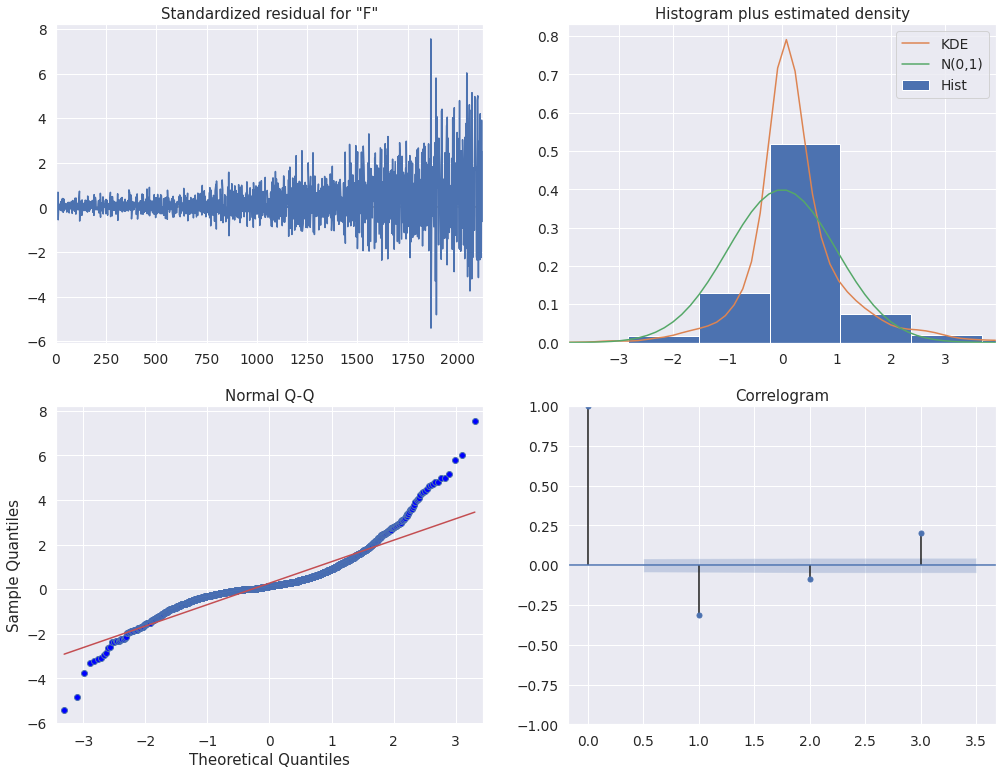

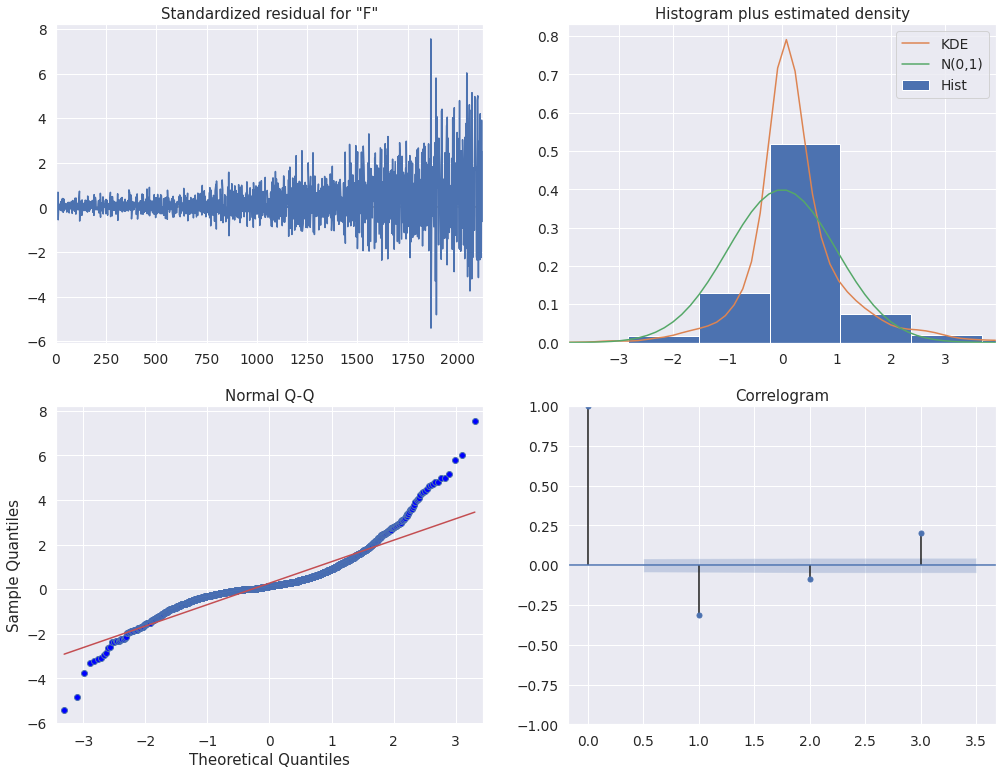

In [ ]:
results.plot_diagnostics(figsize = (15, 12), lags = 3)

Interprentado los gráficos podemos observar lo siguiente:

+ Arriba a la izquiera: los residuos del modelo parece que siguen un proceso de Ruido Blanco (White Noise) y son predecibles. Esto implica que nuestro modelo ha extraído la mayor cantidad de información de los datos.
+ Arriba a la derecha: vemos que la distribución de los residuos sigue una distribución próxima a la Normal (0, 1).
+ Abajo a la derecha: vemos que la autocorrelación parcial entre los residuos y residuos - k, dan lugar a valores  significativos. Esto implica que el modelo  ha sido capaz de reproducir el patrón de comportamiento sistemático de la serie.
+ Abajo a la izquierda: la distrbución ordenada de los residuos sigue una Normal.

***d- Predicción utilizando el modelo***

Para hacer una predicción es suficiente con especificar el número de steps/pasos futuros a estimar

In [ ]:
pred_uc = results.get_forecast(steps = len(y_test))
pred_ci = pred_uc.conf_int()

In [ ]:
y_pred = pred_ci.iloc[:, 0]

RMSE (root mean square error) nos da la diferencia entre los resultados reales y nuestros resultados calculados del modelo. Define la calidad de nuestro modelo (que usa datos cuantitativos), qué tan preciso ha predicho nuestro modelo o el porcentaje de error en nuestro modelo.

In [ ]:
actual = y_test 
predicted = y_pred 
MSE = mean_squared_error(actual, predicted)
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:",RMSE)

Root Mean Square Error: 191388905.7213023
